In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import koreanize_matplotlib

In [2]:
performance_df = pd.read_csv("../datasets/KOPIS/performance/performance_cleaned.csv")

In [93]:
price_stats = pd.read_csv("../datasets/KOPIS/statics/Í∞ÄÍ≤©ÎåÄÎ≥ÑÏòàÎß§ÌÜµÍ≥Ñ.csv")

In [4]:
time_stats = pd.read_csv("../datasets/KOPIS/statics/ÏãúÍ∞ÑÎåÄÎ≥ÑÏòàÎß§ÌÜµÍ≥Ñ.csv")

In [5]:
genre_stats = pd.read_csv("../datasets/KOPIS/statics/Ïû•Î•¥Î≥ÑÏòàÎß§ÌÜµÍ≥Ñ.csv")

In [6]:
genre_service = pd.read_csv("../datasets/KOPIS/statics/Ïû•Î•¥Î≥ÑÌÜµÍ≥ÑÎ™©Î°ù.csv")

In [94]:
# Í∞ÄÍ≤©ÎåÄ Ï†ÑÏ≤òÎ¶¨

# Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
price_map = {
    "0Ïõê": "0",
    "3ÎßåÏõêÎØ∏Îßå": "~3",
    "3ÎßåÏõêÏù¥ÏÉÅ~5ÎßåÏõêÎØ∏Îßå": "3~5",
    "5ÎßåÏõêÏù¥ÏÉÅ~7ÎßåÏõêÎØ∏Îßå": "5~7",
    "7ÎßåÏõêÏù¥ÏÉÅ~10ÎßåÏõêÎØ∏Îßå": "7~10",
    "10ÎßåÏõêÏù¥ÏÉÅ~15ÎßåÏõêÎØ∏Îßå": "10~15",
    "15ÎßåÏõêÏù¥ÏÉÅ": "15~"
}

price_stats['Í∞ÄÍ≤©ÎåÄ'] = price_stats['Í∞ÄÍ≤©ÎåÄ'].map(price_map)

In [96]:
price_stats.to_csv("../datasets/KOPIS/statics/Í∞ÄÍ≤©ÎåÄÎ≥ÑÏòàÎß§ÌÜµÍ≥Ñ.csv", index=False, encoding="utf-8-sig")

In [8]:
import re

def to_hour_group(x):
    # "00:00 ~ 2:59" ‚Üí "0-3"
    # "3:00 ~ 5:59"  ‚Üí "3-6"
    start = re.match(r"(\d+):", x)
    if start:
        start_hour = int(start.group(1))
        # ÎÅùÎÇòÎäî ÏãúÍ∞ÅÏùÄ +3
        end_hour = start_hour + 3
        return f"{start_hour}-{end_hour}"
    return None

time_stats["ÏãúÍ∞ÑÎåÄ_Í∑∏Î£π"] = time_stats["ÏãúÍ∞ÑÎåÄ"].apply(to_hour_group)

In [9]:
def to_daypart(x):
    if pd.isna(x):
        return np.nan
    # "0-3", "3-6" Í∞ôÏùÄ Î¨∏ÏûêÏó¥ÏùÑ Î∞õÏïÑÏÑú Ï£ºÍ∞Ñ/Ï†ÄÎÖÅ/Ïã¨ÏïºÎ°ú Î≥ÄÌôò
    start = int(x.split("-")[0])  # ÏãúÏûë ÏãúÍ∞Ñ
    if 9 <= start < 18:
        return "Ï£ºÍ∞Ñ"
    elif 18 <= start < 24:
        return "Ï†ÄÎÖÅ"
    else:
        return "Ïã¨Ïïº"

# Í∑∏ Í∑∏Î£πÏùÑ Ï£ºÍ∞Ñ/Ï†ÄÎÖÅ/Ïã¨ÏïºÎ°ú Î¨∂Í∏∞
time_stats["ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"] = time_stats["ÏãúÍ∞ÑÎåÄ_Í∑∏Î£π"].apply(to_daypart)

In [107]:
time_stats.to_csv("../datasets/KOPIS/statics/ÏãúÍ∞ÑÎåÄÎ≥ÑÏòàÎß§ÌÜµÍ≥Ñ.csv", index=False, encoding="utf-8-sig")

In [108]:
time_stats.to_csv("../streamlit_play/datasets/ÏãúÍ∞ÑÎåÄÎ≥ÑÏòàÎß§ÌÜµÍ≥Ñ.csv", index=False, encoding="utf-8-sig")

In [10]:
performance_play = performance_df[performance_df["Í≥µÏó∞Ïû•Î•¥Î™Ö"] == "Ïó∞Í∑π"].copy()

In [11]:
# Í≥µÏó∞ÏãúÏûëÏùº Í∏∞Ï§ÄÏúºÎ°ú Ïó∞ÎèÑ Ï∂îÏ∂ú
performance_play["Í≥µÏó∞ÏãúÏûëÏùº"] = pd.to_datetime(performance_play["Í≥µÏó∞ÏãúÏûëÏùº"], errors="coerce")
performance_play["Í≥µÏó∞Ï¢ÖÎ£åÏùº"] = pd.to_datetime(performance_play["Í≥µÏó∞Ï¢ÖÎ£åÏùº"], errors="coerce")

start_date = pd.to_datetime("2023-01-01")
end_date   = pd.to_datetime("2024-12-31")

# 2023~2024 Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
mask = (performance_play["Í≥µÏó∞ÏãúÏûëÏùº"] <= end_date) & (performance_play["Í≥µÏó∞Ï¢ÖÎ£åÏùº"] >= start_date)
performance_play = performance_play.loc[mask].copy()

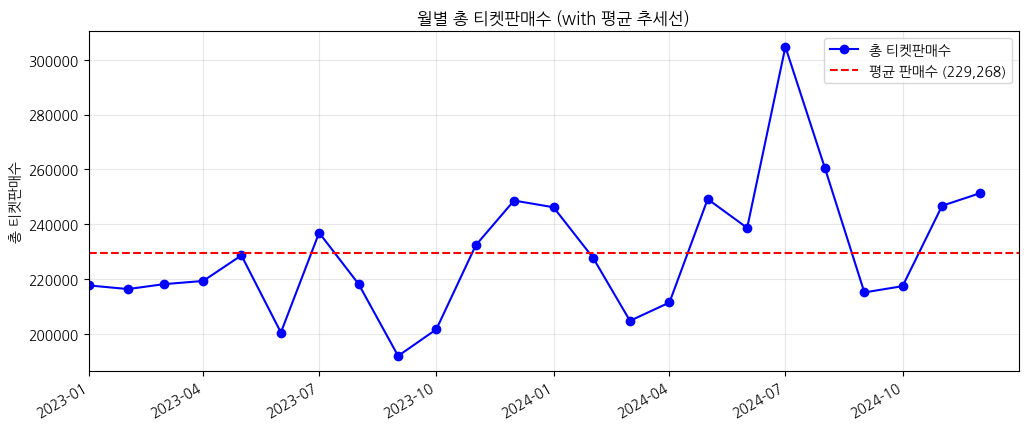

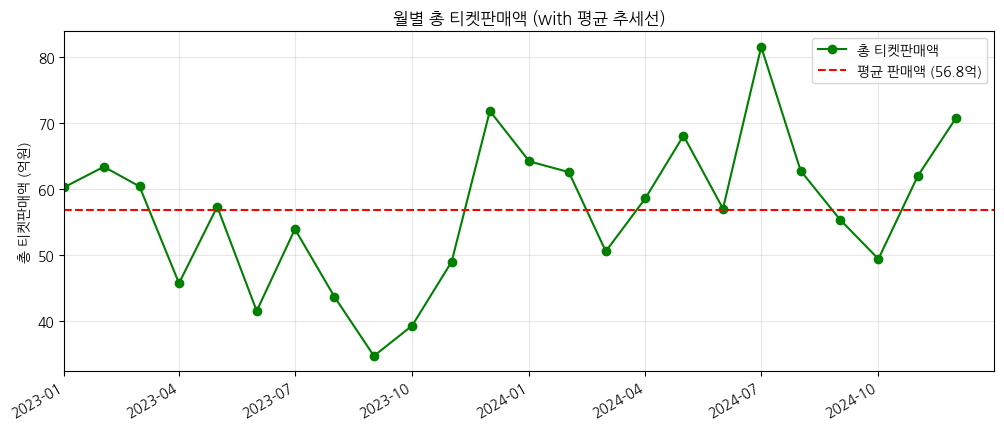

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# ÎÇ†Ïßú Ïª¨Îüº datetime Î≥ÄÌôò
genre_stats["ÎÇ†Ïßú"] = pd.to_datetime(genre_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")

# Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ
monthly_stats = (
    genre_stats.groupby(pd.Grouper(key="ÎÇ†Ïßú", freq="MS"))
    .agg({"Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò": "sum", "Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°": "sum"})
    .reset_index()
)

# ===============================
# 1. Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò (line + ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†)
# ===============================
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(monthly_stats["ÎÇ†Ïßú"], monthly_stats["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"], 
        marker="o", color="blue", label="Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")

# ÌèâÍ∑†ÏÑ†
mean_count = monthly_stats["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"].mean()
ax.axhline(mean_count, color="red", linestyle="--", label=f"ÌèâÍ∑† ÌåêÎß§Ïàò ({mean_count:,.0f})")

# xÏ∂ï Ìè¨Îß∑
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.set_xlim(pd.to_datetime("2023-01-01"), pd.to_datetime("2024-12-31"))

plt.title("ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò (with ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†)")
plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
plt.legend()
plt.grid(True, alpha=0.3)
fig.autofmt_xdate()
plt.show()

# ===============================
# 2. Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (line + ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†)
# ===============================
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(monthly_stats["ÎÇ†Ïßú"], monthly_stats["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"]/1e8, 
        marker="o", color="green", label="Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°")

# ÌèâÍ∑†ÏÑ†
mean_sales = (monthly_stats["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"]/1e8).mean()
ax.axhline(mean_sales, color="red", linestyle="--", 
           label=f"ÌèâÍ∑† ÌåêÎß§Ïï° ({mean_sales:.1f}Ïñµ)")

# xÏ∂ï Ìè¨Îß∑
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.set_xlim(pd.to_datetime("2023-01-01"), pd.to_datetime("2024-12-31"))

plt.title("ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (with ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†)")
plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (ÏñµÏõê)")
plt.legend()
plt.grid(True, alpha=0.3)
fig.autofmt_xdate()
plt.show()


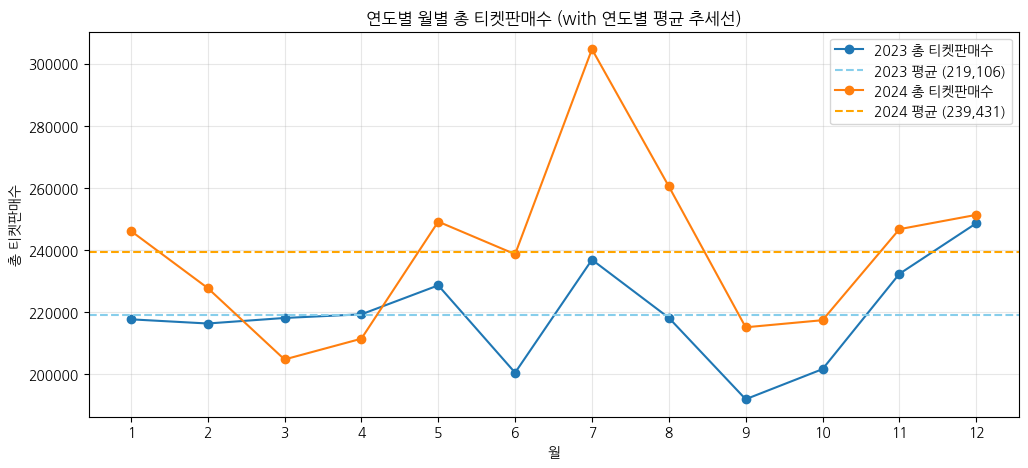

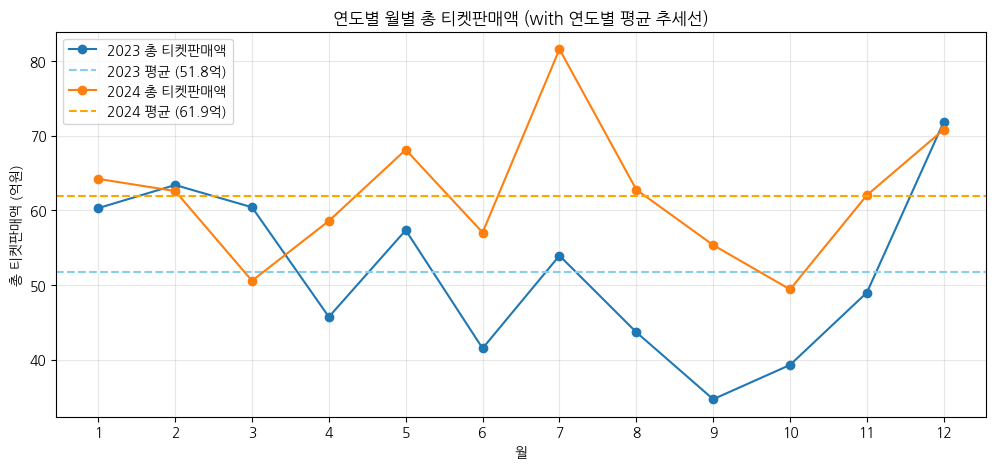

In [66]:
# ===============================
# 1. ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò (Ïó∞ÎèÑÎ≥Ñ)
# ===============================
fig, ax = plt.subplots(figsize=(12,5))

monthly_stats["Ïó∞ÎèÑ"] = monthly_stats["ÎÇ†Ïßú"].dt.year
monthly_stats["Ïõî"] = monthly_stats["ÎÇ†Ïßú"].dt.month

for year in [2023, 2024]:
    data = monthly_stats[monthly_stats["Ïó∞ÎèÑ"] == year]
    ax.plot(data["Ïõî"], data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"], marker="o", label=f"{year} Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    
    # Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑†ÏÑ† ÏÉâÏÉÅ ÏßÄÏ†ï
    y_mean = data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"].mean()
    if year == 2023:
        ax.axhline(y_mean, linestyle="--", color="skyblue", 
                   label=f"{year} ÌèâÍ∑† ({y_mean:,.0f})")
    else:
        ax.axhline(y_mean, linestyle="--", color="orange", 
                   label=f"{year} ÌèâÍ∑† ({y_mean:,.0f})")

plt.title("Ïó∞ÎèÑÎ≥Ñ ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò (with Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†)")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
plt.xticks(range(1,13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ===============================
# 2. ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (Ïó∞ÎèÑÎ≥Ñ)
# ===============================
fig, ax = plt.subplots(figsize=(12,5))

for year in [2023, 2024]:
    data = monthly_stats[monthly_stats["Ïó∞ÎèÑ"] == year]
    ax.plot(data["Ïõî"], data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"]/1e8, marker="o", label=f"{year} Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°")
    
    # Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑†ÏÑ† ÏÉâÏÉÅ ÏßÄÏ†ï
    y_mean = (data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"]/1e8).mean()
    if year == 2023:
        ax.axhline(y_mean, linestyle="--", color="skyblue", 
                   label=f"{year} ÌèâÍ∑† ({y_mean:.1f}Ïñµ)")
    else:
        ax.axhline(y_mean, linestyle="--", color="orange", 
                   label=f"{year} ÌèâÍ∑† ({y_mean:.1f}Ïñµ)")

plt.title("Ïó∞ÎèÑÎ≥Ñ ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (with Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Ï∂îÏÑ∏ÏÑ†)")
plt.xlabel("Ïõî")
plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (ÏñµÏõê)")
plt.xticks(range(1,13))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [12]:
facility_df = pd.read_csv("../datasets/KOPIS/performance/facility_df.csv")

In [13]:
performance_with_facility = performance_play.merge(
    facility_df[['Í≥µÏó∞ÏãúÏÑ§ID', 'Í∞ùÏÑùÏàò', 'ÏãúÍµ∞Íµ¨', 'ÏãúÎèÑ']],
    on='Í≥µÏó∞ÏãúÏÑ§ID', 
    how='left'
)

In [14]:
# Í∞ùÏÑùÏàò Í∏∞Ï§Ä Î∂ÑÎ•ò Ìï®Ïàò
def classify_theater(seats):
    if pd.isna(seats):
        return "Ï†ïÎ≥¥ÏóÜÏùå"
    elif seats >= 1000:
        return "ÎåÄÍ∑πÏû•"
    elif seats >= 500:
        return "Ï§ëÍ∑πÏû•"
    else:
        return "ÏÜåÍ∑πÏû•"

In [15]:
performance_with_facility["Í∑πÏû•Í∑úÎ™®"] = performance_with_facility["Í∞ùÏÑùÏàò"].apply(classify_theater)

In [16]:
# Î¨¥Ïä® Ïó∞Í∑πÏù¥ Ïó¥Î†∏Í∏∏Îûò 24ÎÖÑ 7ÏõîÏóê ÌõÖ Îõ∞ÏóàÎÇò

peak_start = "2024-07-01"
peak_end   = "2024-07-31"

big_shows = performance_with_facility[
    (performance_with_facility["Í≥µÏó∞ÏãúÏûëÏùº"] <= peak_end) &
    (performance_with_facility["Í≥µÏó∞Ï¢ÖÎ£åÏùº"] >= peak_start)
].copy()

big_shows[big_shows['ÏµúÎåÄÍ∞ÄÍ≤©'] > 60000].sort_values(by='ÏµúÎåÄÍ∞ÄÍ≤©', ascending=False).to_csv("big_shows_in_202407.csv", index=False, encoding='utf-8-sig')

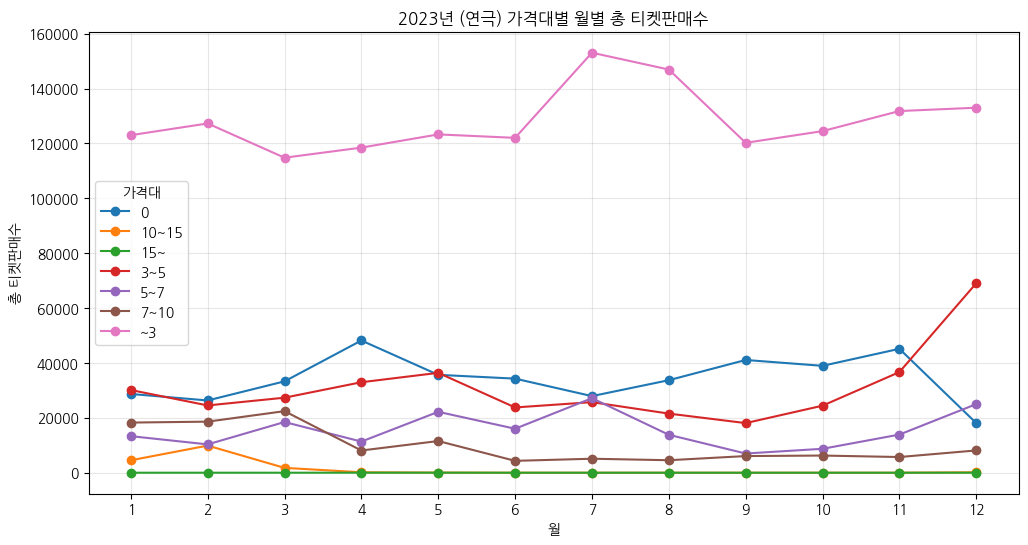

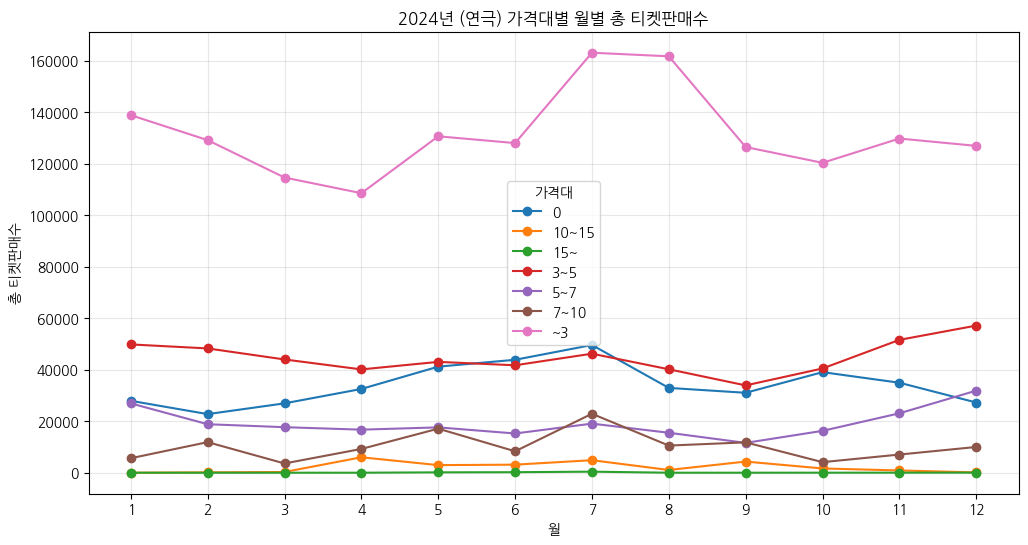

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. ÎÇ†Ïßú Î≥ÄÌôò & ÌïÑÌÑ∞ÎßÅ
price_stats["ÎÇ†Ïßú"] = pd.to_datetime(price_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")
price_stats = price_stats.dropna(subset=["ÎÇ†Ïßú"])

# üé≠ Ïó∞Í∑πÎßå ÌïÑÌÑ∞ÎßÅ
price_stats_play = price_stats[price_stats["Ïû•Î•¥"] == "Ïó∞Í∑π"]

# 2. Ïó∞ÎèÑ Ïª¨Îüº Ï∂îÍ∞Ä
price_stats_play["Ïó∞ÎèÑ"] = price_stats_play["ÎÇ†Ïßú"].dt.year

# 3. Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ
price_monthly = (
    price_stats_play.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="M"), "Í∞ÄÍ≤©ÎåÄ", "Ïó∞ÎèÑ"])
    .agg({"Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò": "sum"})
    .reset_index()
)

# 4. Ïó∞ÎèÑÎ≥Ñ Í∑∏Î¶¨Í∏∞
for year in [2023, 2024]:
    yearly_data = price_monthly[price_monthly["Ïó∞ÎèÑ"] == year].copy()
    
    # Ïõî Ïª¨Îüº Ï∂îÍ∞Ä
    yearly_data["Ïõî"] = yearly_data["ÎÇ†Ïßú"].dt.month
    
    # ÌîºÎ≤ó (Ïõî √ó Í∞ÄÍ≤©ÎåÄ)
    pivot_sales = yearly_data.pivot(index="Ïõî", columns="Í∞ÄÍ≤©ÎåÄ", values="Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    
    # Í∑∏ÎûòÌîÑ
    fig, ax = plt.subplots(figsize=(12,6))
    pivot_sales.plot(ax=ax, marker="o")
    
    plt.title(f"{year}ÎÖÑ (Ïó∞Í∑π) Í∞ÄÍ≤©ÎåÄÎ≥Ñ ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    plt.xlabel("Ïõî")
    plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    plt.xticks(range(1,13))
    plt.legend(title="Í∞ÄÍ≤©ÎåÄ")
    plt.grid(True, alpha=0.3)
    plt.show()


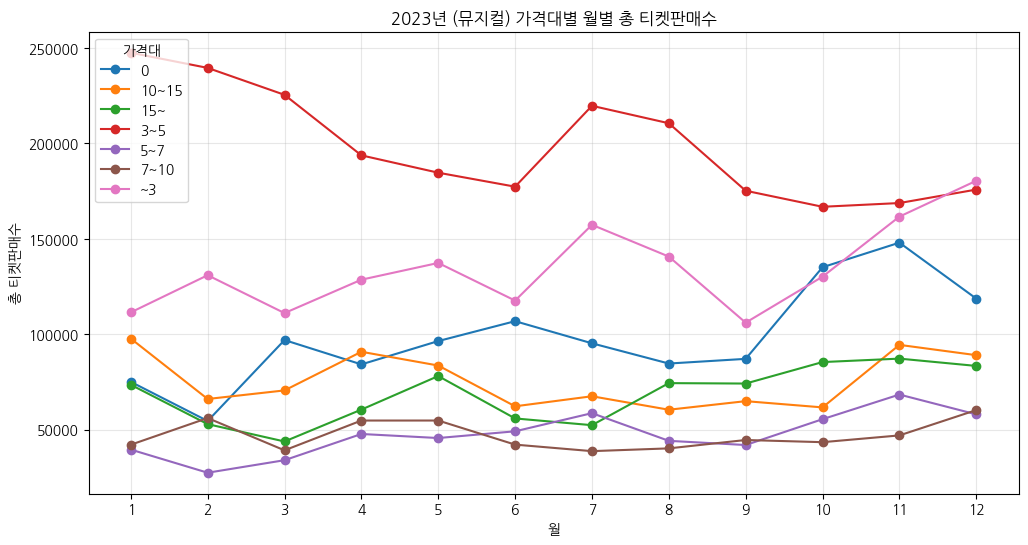

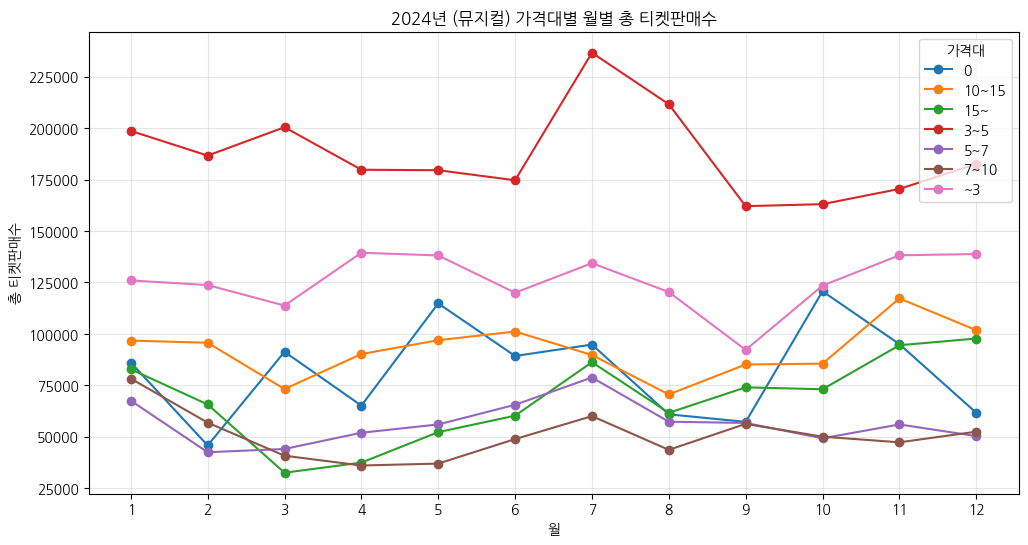

In [114]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. ÎÇ†Ïßú Î≥ÄÌôò & ÌïÑÌÑ∞ÎßÅ
price_stats["ÎÇ†Ïßú"] = pd.to_datetime(price_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")
price_stats = price_stats.dropna(subset=["ÎÇ†Ïßú"])

# üé≠ ÎÆ§ÏßÄÏª¨Îßå ÌïÑÌÑ∞ÎßÅ
price_stats_musical = price_stats[price_stats["Ïû•Î•¥"] == "ÎÆ§ÏßÄÏª¨"]

# 2. Ïó∞ÎèÑ Ïª¨Îüº Ï∂îÍ∞Ä
price_stats_musical["Ïó∞ÎèÑ"] = price_stats_musical["ÎÇ†Ïßú"].dt.year

# 3. Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ
price_monthly = (
    price_stats_musical.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="M"), "Í∞ÄÍ≤©ÎåÄ", "Ïó∞ÎèÑ"])
    .agg({"Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò": "sum"})
    .reset_index()
)

# 4. Ïó∞ÎèÑÎ≥Ñ Í∑∏Î¶¨Í∏∞
for year in [2023, 2024]:
    yearly_data = price_monthly[price_monthly["Ïó∞ÎèÑ"] == year].copy()
    
    # Ïõî Ïª¨Îüº Ï∂îÍ∞Ä
    yearly_data["Ïõî"] = yearly_data["ÎÇ†Ïßú"].dt.month
    
    # ÌîºÎ≤ó (Ïõî √ó Í∞ÄÍ≤©ÎåÄ)
    pivot_sales = yearly_data.pivot(index="Ïõî", columns="Í∞ÄÍ≤©ÎåÄ", values="Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    
    # Í∑∏ÎûòÌîÑ
    fig, ax = plt.subplots(figsize=(12,6))
    pivot_sales.plot(ax=ax, marker="o")
    
    plt.title(f"{year}ÎÖÑ (ÎÆ§ÏßÄÏª¨) Í∞ÄÍ≤©ÎåÄÎ≥Ñ ÏõîÎ≥Ñ Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    plt.xlabel("Ïõî")
    plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò")
    plt.xticks(range(1,13))
    plt.legend(title="Í∞ÄÍ≤©ÎåÄ")
    plt.grid(True, alpha=0.3)
    plt.show()


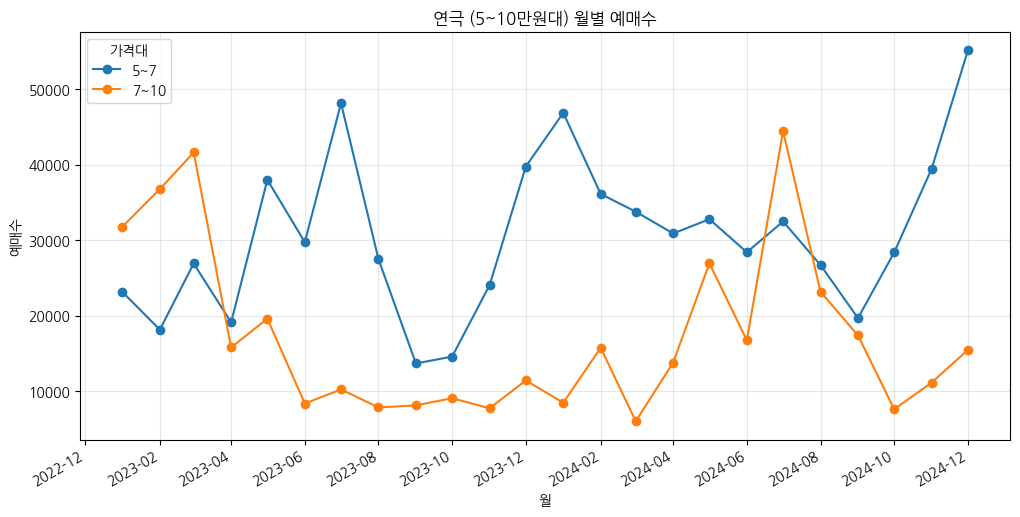

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. ÎÇ†Ïßú Î≥ÄÌôò & Ïó∞Í∑πÎßå ÌïÑÌÑ∞ÎßÅ
price_stats["ÎÇ†Ïßú"] = pd.to_datetime(price_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")
price_stats = price_stats.dropna(subset=["ÎÇ†Ïßú"])
play_price_mid = price_stats[
    (price_stats["Ïû•Î•¥"] == "Ïó∞Í∑π") & 
    (price_stats["Í∞ÄÍ≤©ÎåÄ"].isin(["5~7", "7~10"]))
].copy()

# 2. Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ
play_price_mid["Ïó∞ÎèÑ"] = play_price_mid["ÎÇ†Ïßú"].dt.year
play_price_mid["Ïõî"] = play_price_mid["ÎÇ†Ïßú"].dt.month
play_price_mid["Ïó∞Ïõî"] = pd.to_datetime(play_price_mid["ÎÇ†Ïßú"].dt.to_period("M").astype(str))

monthly = (
    play_price_mid.groupby(["Ïó∞Ïõî","Í∞ÄÍ≤©ÎåÄ"])["ÏòàÎß§Ïàò"]
    .sum()
    .reset_index()
)

# 3. ÏõîÎ≥Ñ ÏòàÎß§Ïàò Í∑∏ÎûòÌîÑ
fig, ax = plt.subplots(figsize=(12,6))
for price in ["5~7", "7~10"]:
    sub = monthly[monthly["Í∞ÄÍ≤©ÎåÄ"] == price]
    ax.plot(sub["Ïó∞Ïõî"], sub["ÏòàÎß§Ïàò"], marker="o", label=price)

# xÏ∂ï ÎÇ†Ïßú Ìè¨Îß∑
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title("Ïó∞Í∑π (5~10ÎßåÏõêÎåÄ) ÏõîÎ≥Ñ ÏòàÎß§Ïàò")
plt.xlabel("Ïõî")
plt.ylabel("ÏòàÎß§Ïàò")
plt.legend(title="Í∞ÄÍ≤©ÎåÄ")
plt.grid(True, alpha=0.3)
fig.autofmt_xdate()
plt.show()

# ÏõîÎ≥Ñ ÏòàÎß§Ïàò
# 5~7Ïõî : ÎåÄÍ∑πÏû• Ï§ëÏã¨Ïùò ÏûëÌíà ÏãúÏ¶å, Î∞©Ìïô Ìú¥Í∞Ä ÏãúÏ¶å
# 12Ïõî : Ïó∞Îßê ÌäπÏàò + ÏÜ°ÎÖÑÍ≥µÏó∞ Ìö®Í≥º

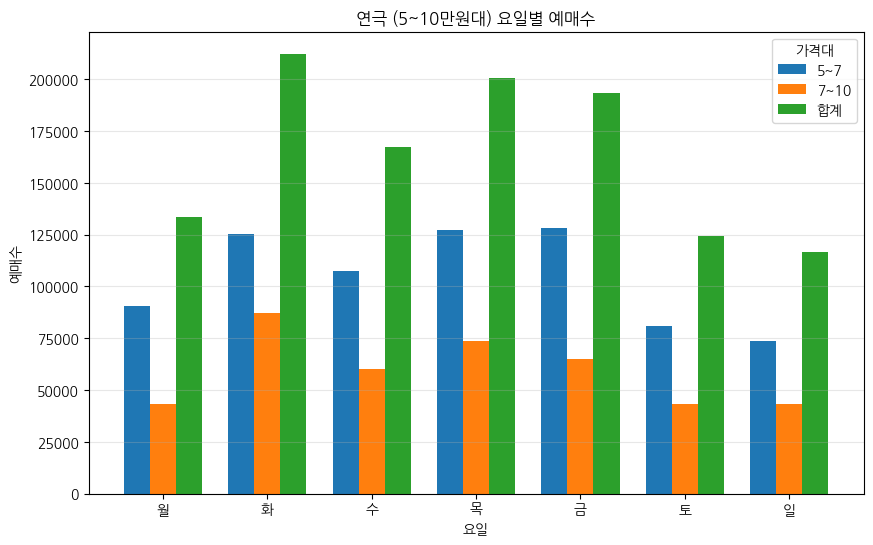

In [ ]:
# ======================
# (B) ÏöîÏùºÎ≥Ñ ÏòàÎß§Ïàò + Ìï©Í≥Ñ
# ======================
play_price_mid["ÏöîÏùº"] = play_price_mid["ÎÇ†Ïßú"].dt.dayofweek

weekday = (
    play_price_mid.groupby(["ÏöîÏùº","Í∞ÄÍ≤©ÎåÄ"])["ÏòàÎß§Ïàò"]
    .sum()
    .reset_index()
)

# Ìï©Í≥Ñ Ï∂îÍ∞Ä
weekday_total = (
    play_price_mid.groupby(["ÏöîÏùº"])["ÏòàÎß§Ïàò"]
    .sum()
    .reset_index()
)
weekday_total["Í∞ÄÍ≤©ÎåÄ"] = "Ìï©Í≥Ñ"

weekday_all = pd.concat([weekday, weekday_total], ignore_index=True)

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ
fig, ax = plt.subplots(figsize=(10,6))
labels = ["Ïõî","Ìôî","Ïàò","Î™©","Í∏à","ÌÜ†","Ïùº"]

width = 0.25
x = weekday_all["ÏöîÏùº"].unique()

for i, price in enumerate(["5~7", "7~10", "Ìï©Í≥Ñ"]):
    sub = weekday_all[weekday_all["Í∞ÄÍ≤©ÎåÄ"] == price]
    ax.bar(sub["ÏöîÏùº"] + (i-1)*width, sub["ÏòàÎß§Ïàò"], 
           width=width, label=price)

ax.set_xticks(range(7))
ax.set_xticklabels(labels)
plt.title("Ïó∞Í∑π (5~10ÎßåÏõêÎåÄ) ÏöîÏùºÎ≥Ñ ÏòàÎß§Ïàò")
plt.xlabel("ÏöîÏùº")
plt.ylabel("ÏòàÎß§Ïàò")
plt.legend(title="Í∞ÄÍ≤©ÎåÄ")
plt.grid(True, alpha=0.3, axis="y")
plt.show()


# ÏöîÏùº
# ÌôîÎ™©Í∏àÏóê ÏòàÎß§Ïàò ÏµúÍ≥†Ïπò -> Ï£ºÎßêÎ≥¥Îã§ ÌèâÏùº Í≥µÏó∞Ïùò ÏòàÎß§ÏàòÍ∞Ä Îçî ÎßéÏùå
# -> ÌèâÏùº Ï†ÄÎÖÅ ÎåÄÍ∑πÏû• ÏûëÌíà Ï§ëÏã¨ÏúºÎ°ú ÎßàÏºÄÌåÖÏù¥ Ïûò Î®πÌûò ()
# Ï£ºÎßêÏóêÎäî Ïò§ÌûàÎ†§ ÏòàÎß§Ïàò Ï§ÑÏùå -> Ï£ºÎßêÏóê ÎÜÄÎü¨ ÎÇòÏò§Îäî ÏÇ¨ÎûåÎì§ÏùÄ Í≥†Í∞Ä Ïó∞Í∑πÎ≥¥Îã® Ï†ÄÍ∞Ä Ïó∞Í∑πÏùÑ ÌÉùÌï† Í≤É
# ÏõîÏöîÏùº: ÏµúÏ†Ä ÏòàÎß§Ïú® -> ÏõîÏöîÏùº Í≥µÏó∞ Ïâ¨Îäî ÎÇ† ÎßéÏùå, Ïã§Ï†ú ÏàòÏöîÎèÑ Ï†ÅÏùå
# -> ÏõîÏöîÏùºÏóê Ïò§Îäî ÏÇ¨ÎûåÎì§ÏùÑ ÏúÑÌï¥ ÌîÑÎ°úÎ™®ÏÖò?


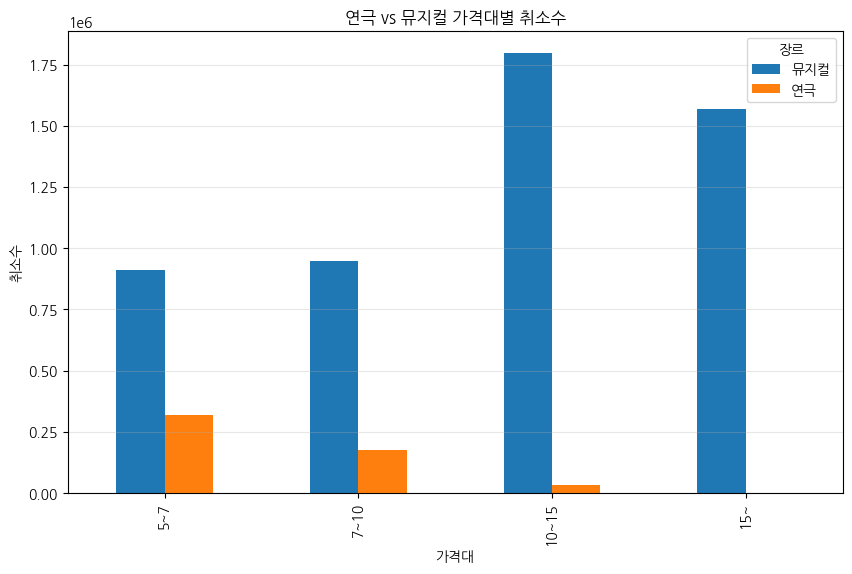

Ïû•Î•¥         ÎÆ§ÏßÄÏª¨      Ïó∞Í∑π
Í∞ÄÍ≤©ÎåÄ                   
5~7     909936  319128
7~10    948239  174357
10~15  1796756   32585
15~    1568006     749


In [ ]:
import matplotlib.pyplot as plt

# 1. Î∂ÑÏÑùÌï† Í∞ÄÍ≤©ÎåÄ (ÏàúÏÑú ÏßÄÏ†ï)
target_prices = ["5~7", "7~10", "10~15", "15~"]

# 2. Ïó∞Í∑π/ÎÆ§ÏßÄÏª¨Îßå ÌïÑÌÑ∞ÎßÅ
df_cancel = price_stats[
    (price_stats["Ïû•Î•¥"].isin(["Ïó∞Í∑π", "ÎÆ§ÏßÄÏª¨"])) &
    (price_stats["Í∞ÄÍ≤©ÎåÄ"].isin(target_prices))
].copy()

# 3. Ïà´ÏûêÌòï Î≥ÄÌôò
df_cancel["Ï∑®ÏÜåÏàò"] = pd.to_numeric(df_cancel["Ï∑®ÏÜåÏàò"], errors="coerce")

# 4. Í∑∏Î£πÌôî
cancel_stats = (
    df_cancel.groupby(["Í∞ÄÍ≤©ÎåÄ","Ïû•Î•¥"])["Ï∑®ÏÜåÏàò"]
    .sum()
    .reset_index()
)

# 5. Í∞ÄÍ≤©ÎåÄ ÏàúÏÑú Ï†ïÎ†¨
cancel_stats["Í∞ÄÍ≤©ÎåÄ"] = pd.Categorical(cancel_stats["Í∞ÄÍ≤©ÎåÄ"], categories=target_prices, ordered=True)
cancel_stats = cancel_stats.sort_values("Í∞ÄÍ≤©ÎåÄ")

# 6. ÌîºÎ≤ó (ÏãúÍ∞ÅÌôî Ìé∏Î¶¨ÌïòÍ≤å)
pivot_cancel = cancel_stats.pivot(index="Í∞ÄÍ≤©ÎåÄ", columns="Ïû•Î•¥", values="Ï∑®ÏÜåÏàò").fillna(0)

# 7. ÏãúÍ∞ÅÌôî
pivot_cancel.plot(kind="bar", figsize=(10,6))
plt.title("Ïó∞Í∑π vs ÎÆ§ÏßÄÏª¨ Í∞ÄÍ≤©ÎåÄÎ≥Ñ Ï∑®ÏÜåÏàò")
plt.xlabel("Í∞ÄÍ≤©ÎåÄ")
plt.ylabel("Ï∑®ÏÜåÏàò")
plt.legend(title="Ïû•Î•¥")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

# 8. Ï†ïÎ¶¨Îêú ÌÖåÏù¥Î∏îÎèÑ Ï∂úÎ†•
print(pivot_cancel)

# ÌåêÎß§ Í∑úÎ™®Í∞Ä Ï†ÅÏúºÎãà ÎãπÏó∞Ìûà Ï∑®ÏÜå Ïàò Ï†ÅÍ≤å Ïû°Ìûò
# Ï∑®ÏÜåÏú®ÏùÑ Î≥¥Ïûê


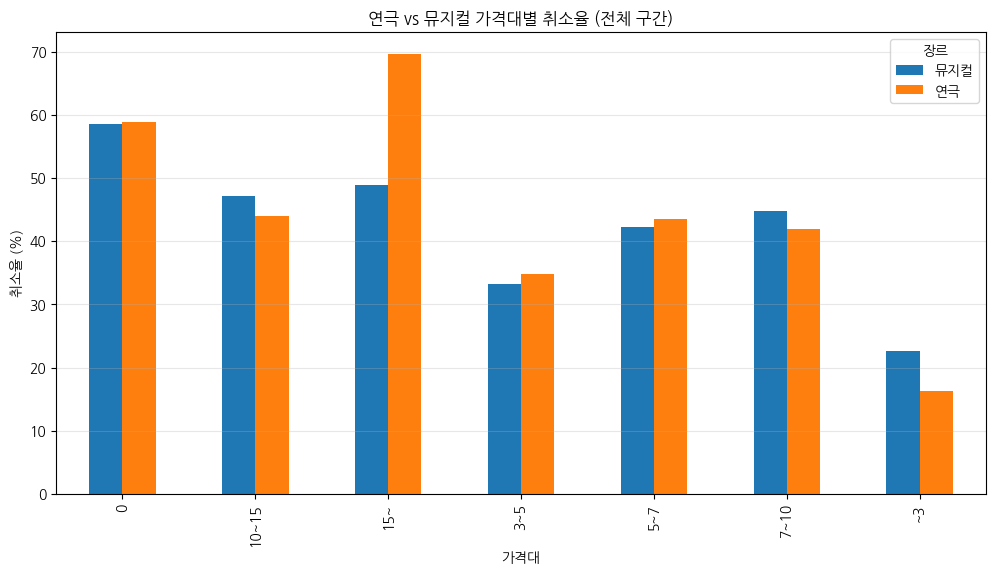

Ïû•Î•¥       ÎÆ§ÏßÄÏª¨     Ïó∞Í∑π
Í∞ÄÍ≤©ÎåÄ                
0      58.58  58.82
10~15  47.15  43.96
15~    48.87  69.61
3~5    33.24  34.80
5~7    42.22  43.52
7~10   44.73  41.97
~3     22.64  16.31


In [124]:
import matplotlib.pyplot as plt

# 1. Ïó∞Í∑π/ÎÆ§ÏßÄÏª¨Îßå ÌïÑÌÑ∞ÎßÅ
df_rate_all = price_stats[price_stats["Ïû•Î•¥"].isin(["Ïó∞Í∑π", "ÎÆ§ÏßÄÏª¨"])].copy()

# 2. Ïà´ÏûêÌòï Î≥ÄÌôò
df_rate_all["Ï∑®ÏÜåÏàò"] = pd.to_numeric(df_rate_all["Ï∑®ÏÜåÏàò"], errors="coerce")
df_rate_all["ÏòàÎß§Ïàò"] = pd.to_numeric(df_rate_all["ÏòàÎß§Ïàò"], errors="coerce")

# 3. Í∑∏Î£πÌôî (Í∞ÄÍ≤©ÎåÄ √ó Ïû•Î•¥)
cancel_rate_all = (
    df_rate_all.groupby(["Í∞ÄÍ≤©ÎåÄ","Ïû•Î•¥"])[["Ï∑®ÏÜåÏàò","ÏòàÎß§Ïàò"]]
    .sum()
    .reset_index()
)

# 4. Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞
cancel_rate_all["Ï∑®ÏÜåÏú®(%)"] = (cancel_rate_all["Ï∑®ÏÜåÏàò"] / cancel_rate_all["ÏòàÎß§Ïàò"]) * 100

# 5. ÌîºÎ≤ó
pivot_rate_all = cancel_rate_all.pivot(index="Í∞ÄÍ≤©ÎåÄ", columns="Ïû•Î•¥", values="Ï∑®ÏÜåÏú®(%)").fillna(0)

# 6. ÏãúÍ∞ÅÌôî
pivot_rate_all.plot(kind="bar", figsize=(12,6))
plt.title("Ïó∞Í∑π vs ÎÆ§ÏßÄÏª¨ Í∞ÄÍ≤©ÎåÄÎ≥Ñ Ï∑®ÏÜåÏú® (Ï†ÑÏ≤¥ Íµ¨Í∞Ñ)")
plt.xlabel("Í∞ÄÍ≤©ÎåÄ")
plt.ylabel("Ï∑®ÏÜåÏú® (%)")
plt.legend(title="Ïû•Î•¥")
plt.grid(True, alpha=0.3, axis="y")
plt.show()

# 7. ÌëúÎèÑ ÌôïÏù∏
print(pivot_rate_all.round(2))


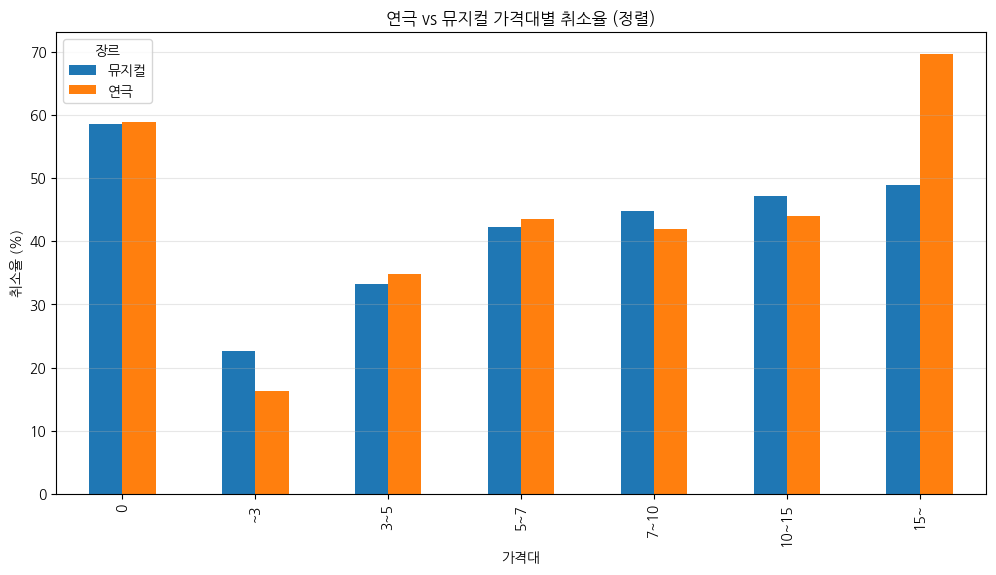

Ïû•Î•¥       ÎÆ§ÏßÄÏª¨     Ïó∞Í∑π
Í∞ÄÍ≤©ÎåÄ                
0      58.58  58.82
~3     22.64  16.31
3~5    33.24  34.80
5~7    42.22  43.52
7~10   44.73  41.97
10~15  47.15  43.96
15~    48.87  69.61


In [ ]:
# 1. ÏõêÌïòÎäî Í∞ÄÍ≤©ÎåÄ ÏàúÏÑú Ï†ïÏùò
price_order = ["0", "~3", "3~5", "5~7", "7~10", "10~15", "15~"]

# 2. Ïó∞Í∑π/ÎÆ§ÏßÄÏª¨Îßå ÌïÑÌÑ∞ÎßÅ
df_rate_all = price_stats[price_stats["Ïû•Î•¥"].isin(["Ïó∞Í∑π", "ÎÆ§ÏßÄÏª¨"])].copy()

# 3. Ïà´ÏûêÌòï Î≥ÄÌôò
df_rate_all["Ï∑®ÏÜåÏàò"] = pd.to_numeric(df_rate_all["Ï∑®ÏÜåÏàò"], errors="coerce")
df_rate_all["ÏòàÎß§Ïàò"] = pd.to_numeric(df_rate_all["ÏòàÎß§Ïàò"], errors="coerce")

# 4. Í∑∏Î£πÌôî
cancel_rate_all = (
    df_rate_all.groupby(["Í∞ÄÍ≤©ÎåÄ","Ïû•Î•¥"])[["Ï∑®ÏÜåÏàò","ÏòàÎß§Ïàò"]]
    .sum()
    .reset_index()
)

# 5. Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞
cancel_rate_all["Ï∑®ÏÜåÏú®(%)"] = (cancel_rate_all["Ï∑®ÏÜåÏàò"] / cancel_rate_all["ÏòàÎß§Ïàò"]) * 100

# 6. Í∞ÄÍ≤©ÎåÄ ÏàúÏÑú ÏßÄÏ†ï
cancel_rate_all["Í∞ÄÍ≤©ÎåÄ"] = pd.Categorical(cancel_rate_all["Í∞ÄÍ≤©ÎåÄ"], 
                                        categories=price_order, 
                                        ordered=True)
cancel_rate_all = cancel_rate_all.sort_values("Í∞ÄÍ≤©ÎåÄ")

# 7. ÌîºÎ≤ó
pivot_rate_all = cancel_rate_all.pivot(index="Í∞ÄÍ≤©ÎåÄ", columns="Ïû•Î•¥", values="Ï∑®ÏÜåÏú®(%)").fillna(0)

# 8. ÏãúÍ∞ÅÌôî
pivot_rate_all.plot(kind="bar", figsize=(12,6))
plt.title("Ïó∞Í∑π vs ÎÆ§ÏßÄÏª¨ Í∞ÄÍ≤©ÎåÄÎ≥Ñ Ï∑®ÏÜåÏú® (Ï†ïÎ†¨)")
plt.xlabel("Í∞ÄÍ≤©ÎåÄ")
plt.ylabel("Ï∑®ÏÜåÏú® (%)")
plt.legend(title="Ïû•Î•¥")
plt.grid(True, alpha=0.3, axis="y")
plt.show()

# 9. ÌôïÏù∏Ïö© ÌÖåÏù¥Î∏î
print(pivot_rate_all.round(2))

# Ï†ÄÍ∞Ä(3ÎßåÏõê ÎØ∏Îßå): Ï∑®ÏÜåÏú®Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùå ‚Üí Í∞ÄÎ≥çÍ≤å ÏòàÎß§ÌïòÍ≥† Í∑∏ÎåÄÎ°ú Í¥ÄÎûåÍπåÏßÄ Ïù¥Ïñ¥ÏßÄÎäî Í≤ΩÌñ•.
# Ï§ëÍ∞Ä(5~10ÎßåÏõê): ÎÆ§ÏßÄÏª¨Í≥º ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏñ¥Ïßê ‚Üí Ïù¥ Íµ¨Í∞ÑÎ∂ÄÌÑ∞Îäî Ïó∞Í∑πÎèÑ ‚ÄúÎÆ§ÏßÄÏª¨ ÏàòÏ§Ä‚ÄùÏùò Í≥†ÎØºÏùÑ ÌïòÍ≤å ÎêòÎäî ÎìØ.
# Í≥†Í∞Ä(15ÎßåÏõê Ïù¥ÏÉÅ): Ï∑®ÏÜåÏú®Ïù¥ ÎÆ§ÏßÄÏª¨Î≥¥Îã§ Ìõ®Ïî¨ ÎÜíÏùå ‚Üí *‚ÄúÏó∞Í∑πÏóê Í≥†Í∞ÄÎ•º ÏßÄÎ∂àÌïòÎäî Í±¥ Î∂ÄÎã¥Ïä§ÎüΩÎã§‚Äù*ÎùºÎäî ÏÜåÎπÑÏûê Ïã¨Î¶¨Í∞Ä Î∞òÏòÅÎêú Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.


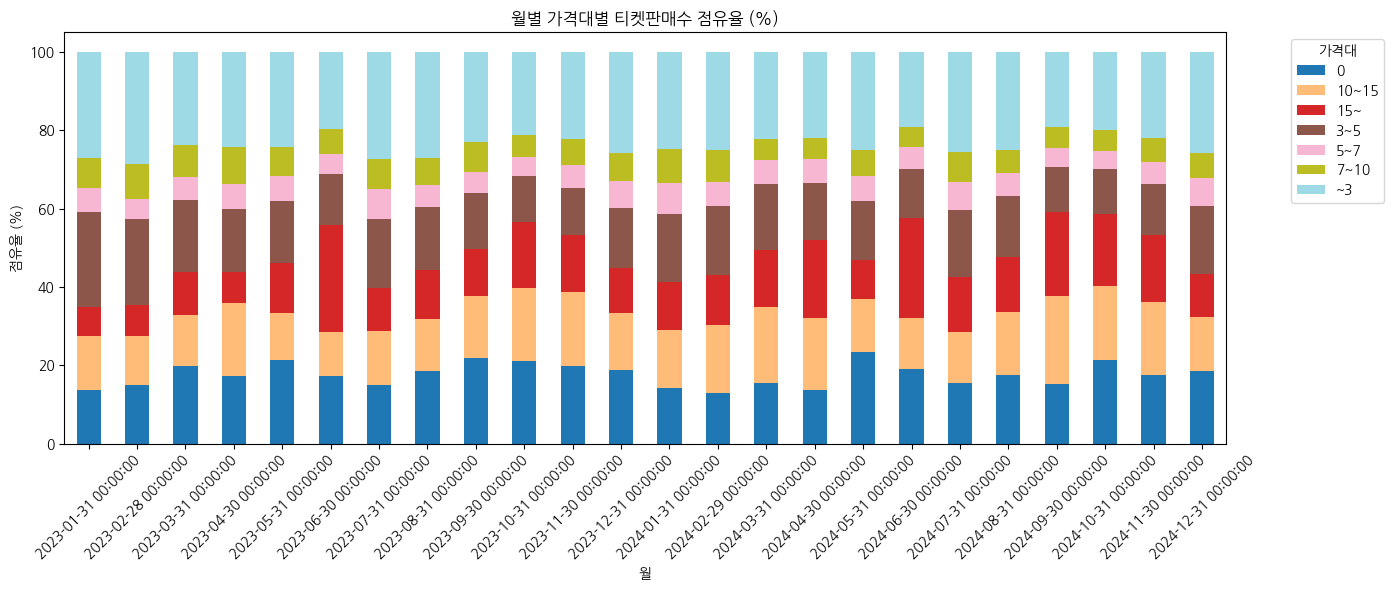

In [130]:
import matplotlib.pyplot as plt

# 1. Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ (Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò Ìï©Í≥Ñ)
monthly_sales = (
    price_stats.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="M"), "Í∞ÄÍ≤©ÎåÄ"])["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"]
    .sum()
    .reset_index()
)

# 2. ÌîºÎ≤ó (Ìñâ=Ïõî, Ïó¥=Í∞ÄÍ≤©ÎåÄ, Í∞í=Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò)
pivot_sales = monthly_sales.pivot(index="ÎÇ†Ïßú", columns="Í∞ÄÍ≤©ÎåÄ", values="Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò").fillna(0)

# 3. Ï†êÏú†Ïú® Í≥ÑÏÇ∞
pivot_share = pivot_sales.div(pivot_sales.sum(axis=1), axis=0) * 100

# 4. Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14,6))
pivot_share.plot(kind="bar", stacked=True, ax=ax, cmap="tab20")

plt.title("ÏõîÎ≥Ñ Í∞ÄÍ≤©ÎåÄÎ≥Ñ Ìã∞ÏºìÌåêÎß§Ïàò Ï†êÏú†Ïú® (%)")
plt.xlabel("Ïõî")
plt.ylabel("Ï†êÏú†Ïú® (%)")
plt.xticks(rotation=45)
plt.legend(title="Í∞ÄÍ≤©ÎåÄ", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

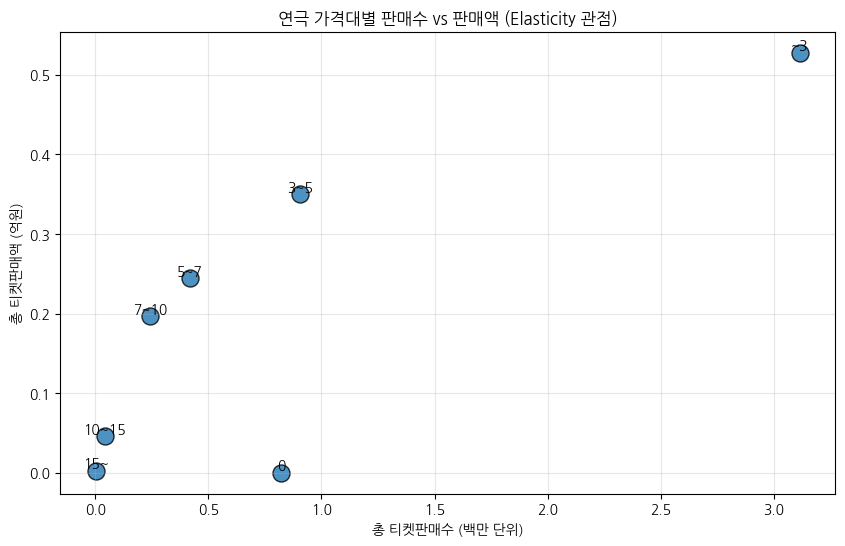

In [137]:
import matplotlib.pyplot as plt

# üé≠ Ïó∞Í∑πÎßå ÌïÑÌÑ∞ÎßÅ
play_stats = price_stats[price_stats["Ïû•Î•¥"] == "Ïó∞Í∑π"].copy()

# 1. Í∞ÄÍ≤©ÎåÄÎ≥Ñ ÏßëÍ≥Ñ
scatter_data = (
    play_stats.groupby("Í∞ÄÍ≤©ÎåÄ")[["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò", "Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"]]
    .sum()
    .reset_index()
)

# 2. Îã®ÏúÑ Î≥ÄÌôò
scatter_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Î∞±Îßå"] = scatter_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"] / 1e6
scatter_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°_Ïñµ"] = scatter_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"] / 1e8

# 3. Ïä§Ï∫êÌÑ∞ ÌîåÎ°Ø
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(
    scatter_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Î∞±Îßå"], 
    scatter_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°_Ïñµ"],  
    s=150, alpha=0.8, cmap="tab10", edgecolor="black"
)

# ÎùºÎ≤® Ï∂îÍ∞Ä
for i, row in scatter_data.iterrows():
    ax.text(row["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Î∞±Îßå"], row["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°_Ïñµ"], row["Í∞ÄÍ≤©ÎåÄ"], 
            fontsize=10, ha="center", va="bottom")

plt.title("Ïó∞Í∑π Í∞ÄÍ≤©ÎåÄÎ≥Ñ ÌåêÎß§Ïàò vs ÌåêÎß§Ïï° (Elasticity Í¥ÄÏ†ê)")
plt.xlabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò (Î∞±Îßå Îã®ÏúÑ)")
plt.ylabel("Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï° (ÏñµÏõê)")
plt.grid(True, alpha=0.3)
plt.show()

Ï¥ù ÌåêÎß§Ïàò: 906,905
ÏÜêÏùµÎ∂ÑÍ∏∞ ÌåêÎß§Ïàò: 544,143
ÏÜêÏùµÎ∂ÑÍ∏∞ Í∞êÏÜåÏú®: 40.0%


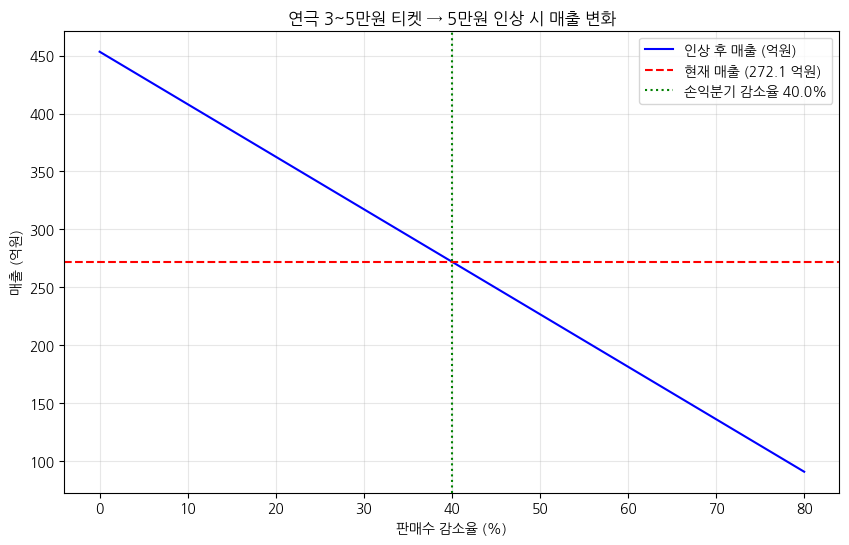

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# üé≠ Ïó∞Í∑πÎßå ÌïÑÌÑ∞ÎßÅ
play_price_stats = price_stats[price_stats["Ïû•Î•¥"] == "Ïó∞Í∑π"].copy()

# 3~5ÎßåÏõêÎåÄ ÏßëÍ≥Ñ
target_data = play_price_stats[play_price_stats["Í∞ÄÍ≤©ÎåÄ"] == "3~5"]
total_sales = target_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò"].sum()
total_revenue = target_data["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïï°"].sum()

# ÌòÑÏû¨ Í∞ÄÍ≤©Í≥º Ïù∏ÏÉÅ Í∞ÄÍ≤©
P_now = 30000
P_new = 50000
Q_now = total_sales
R_now = P_now * Q_now

# ÏÜêÏùµÎ∂ÑÍ∏∞Ï†ê ÌåêÎß§Ïàò
Q_break = R_now / P_new
decrease_rate_break = 1 - (Q_break / Q_now)

print(f"Ï¥ù ÌåêÎß§Ïàò: {Q_now:,}")
print(f"ÏÜêÏùµÎ∂ÑÍ∏∞ ÌåêÎß§Ïàò: {Q_break:,.0f}")
print(f"ÏÜêÏùµÎ∂ÑÍ∏∞ Í∞êÏÜåÏú®: {decrease_rate_break:.1%}")

# üìä Îß§Ï∂ú Î≥ÄÌôî ÏãúÎÆ¨Î†àÏù¥ÏÖò
decrease_rates = np.linspace(0, 0.8, 50)  # ÌåêÎß§Ïàò Í∞êÏÜåÏú® 0%~80%
Q_new = Q_now * (1 - decrease_rates)
R_new = P_new * Q_new

plt.figure(figsize=(10,6))
plt.plot(decrease_rates*100, R_new/1e8, label="Ïù∏ÏÉÅ ÌõÑ Îß§Ï∂ú (ÏñµÏõê)", color="blue")
plt.axhline(R_now/1e8, color="red", linestyle="--", label=f"ÌòÑÏû¨ Îß§Ï∂ú ({R_now/1e8:.1f} ÏñµÏõê)")
plt.axvline(decrease_rate_break*100, color="green", linestyle=":", 
            label=f"ÏÜêÏùµÎ∂ÑÍ∏∞ Í∞êÏÜåÏú® {decrease_rate_break*100:.1f}%")

plt.title("Ïó∞Í∑π 3~5ÎßåÏõê Ìã∞Ïºì ‚Üí 5ÎßåÏõê Ïù∏ÏÉÅ Ïãú Îß§Ï∂ú Î≥ÄÌôî")
plt.xlabel("ÌåêÎß§Ïàò Í∞êÏÜåÏú® (%)")
plt.ylabel("Îß§Ï∂ú (ÏñµÏõê)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


3ÎßåÏõêÎåÄ Ìã∞Ïºì ‚Üí 5ÎßåÏõêÏúºÎ°ú Ïù∏ÏÉÅ

Ìôî¬∑Î™©¬∑Í∏àÏùÄ Ïñ¥Ï∞®Ìîº ÏÇ¨ÎûåÎì§Ïù¥ ÏßëÏ§ëÏ†ÅÏúºÎ°ú ÏòàÎß§ÌïòÎäî ÎÇ†Ïù¥Îùº, Í∞ÄÍ≤© Ïù∏ÏÉÅ ÌõÑÏóêÎèÑ Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.

ÏïÑÍπå Í≥ÑÏÇ∞Ìïú Í≤ÉÏ≤òÎüº Ïù¥ÌÉàÎ•†Ïù¥ 40% Ïù¥ÌïòÎùºÎ©¥ Î¨¥Ï°∞Í±¥ Ïù¥ÎìùÏù¥ÎØÄÎ°ú, Ìôî¬∑Î™©¬∑Í∏à ÏöîÏùºÏóê ÌïúÌï¥ Í∞ÄÍ≤© Ïù∏ÏÉÅ Ï†ÑÎûµÏùÑ Ïì∞Î©¥ Î¶¨Ïä§ÌÅ¨ ÏµúÏÜåÌôî + Îß§Ï∂ú ÏÉÅÏäπ Ìö®Í≥ºÎ•º ÎèôÏãúÏóê ÏñªÏùÑ Ïàò ÏûàÏùå.|

Ìôî¬∑Î™©¬∑Í∏àÏóêÎßå 5ÎßåÏõê Ïù¥ÏÉÅ Íµ¨Í∞ÑÏùò Ï¢åÏÑùÏùÑ ÌïúÏ†ï Ï†úÍ≥µ

‚ÄúÌîÑÎùºÏûÑ ÏöîÏùº ÌäπÎ≥ÑÍ∞Ä‚ÄùÏ≤òÎüº Î∏åÎûúÎî©ÌïòÎ©¥ ÏÜåÎπÑÏûê Î∞òÎ∞úÎèÑ Ï§ÑÏùº Ïàò ÏûàÏùå.

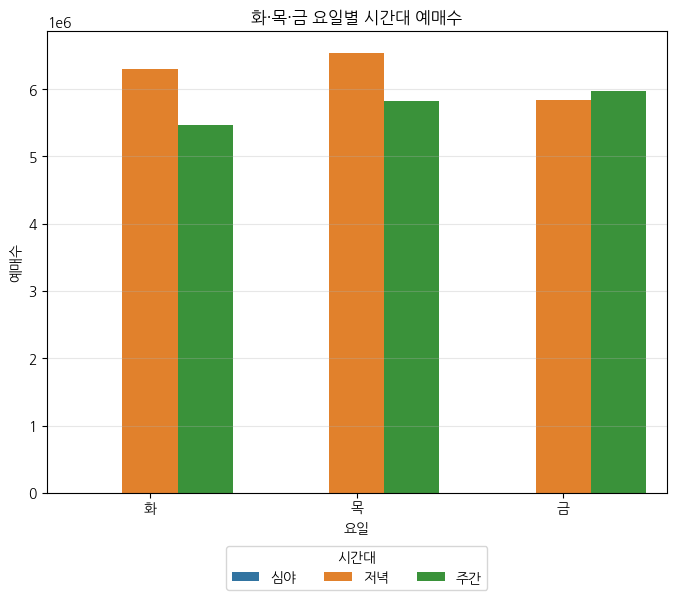

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# ÎÇ†Ïßú Î≥ÄÌôò & ÏöîÏùº Ï∂îÍ∞Ä
time_stats["ÎÇ†Ïßú"] = pd.to_datetime(time_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")

# ÏöîÏùº Î≤àÌò∏ Î∞òÌôò (0=ÏõîÏöîÏùº, ..., 6=ÏùºÏöîÏùº)
time_stats["ÏöîÏùºÎ≤àÌò∏"] = time_stats["ÎÇ†Ïßú"].dt.dayofweek

# Íµ≠Î¨∏ Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
weekday_map = {
    0: "Ïõî",
    1: "Ìôî",
    2: "Ïàò",
    3: "Î™©",
    4: "Í∏à",
    5: "ÌÜ†",
    6: "Ïùº"
}

# Íµ≠Î¨∏ ÏöîÏùº Ïª¨Îüº Ï∂îÍ∞Ä
time_stats["ÏöîÏùº"] = time_stats["ÏöîÏùºÎ≤àÌò∏"].map(weekday_map)

# Ìôî¬∑Î™©¬∑Í∏àÎßå ÌïÑÌÑ∞ÎßÅ
filtered = time_stats[time_stats["ÏöîÏùº"].isin(["Ìôî", "Î™©", "Í∏à"])]

# ÏöîÏùº √ó ÏãúÍ∞ÑÎåÄ ÏßëÍ≥Ñ
grouped = (
    filtered.groupby(["ÏöîÏùº", "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])
    .agg({"ÏòàÎß§Ïàò": "sum"})
    .reset_index()
)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,6))
sns.barplot(data=grouped, x="ÏöîÏùº", y="ÏòàÎß§Ïàò", hue="ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò", order=["Ìôî", "Î™©", "Í∏à"])

plt.title("Ìôî¬∑Î™©¬∑Í∏à ÏöîÏùºÎ≥Ñ ÏãúÍ∞ÑÎåÄ ÏòàÎß§Ïàò")
plt.ylabel("ÏòàÎß§Ïàò")
plt.xlabel("ÏöîÏùº")
plt.legend(
    title="ÏãúÍ∞ÑÎåÄ",
    loc="upper center",        # ÏúÑÏ™Ω Ï§ëÏïô
    bbox_to_anchor=(0.5, -0.1),  # (x, y) Ï¢åÌëú ‚Üí y=-0.1Î°ú Í∑∏ÎûòÌîÑ ÏïÑÎûòÏ™Ω
    ncol=3                     # Í∞ÄÎ°úÎ°ú 3Ïó¥ Ï†ïÎ†¨
)
plt.grid(axis="y", alpha=0.3)
plt.show()


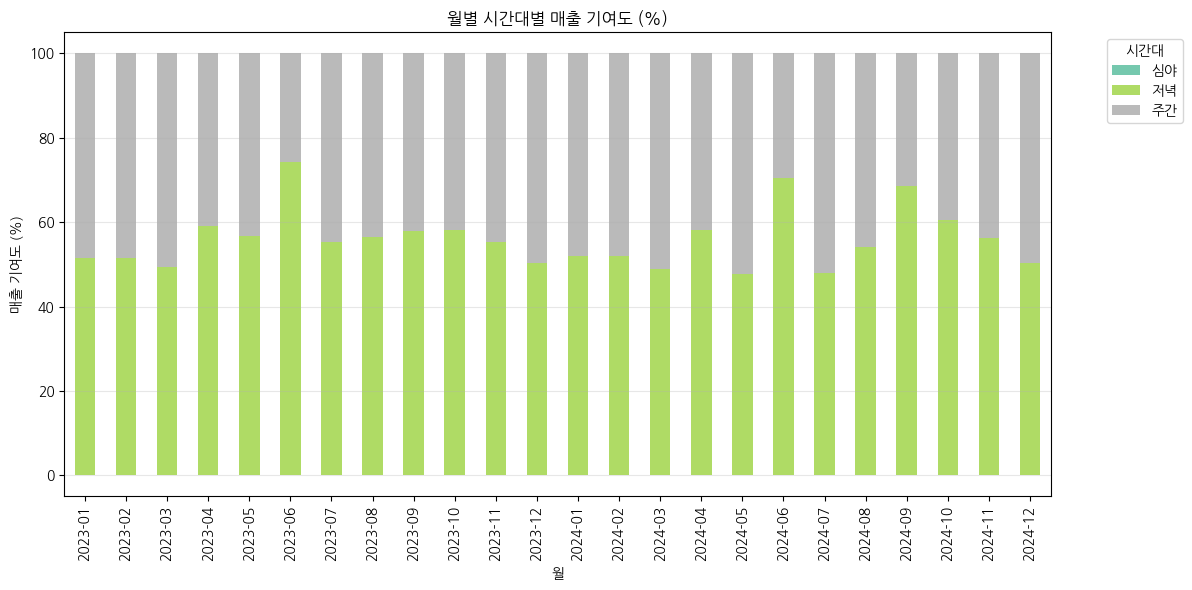

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ÎÇ†Ïßú Î≥ÄÌôò
time_stats["ÎÇ†Ïßú"] = pd.to_datetime(time_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")

# Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ
monthly_sales = (
    time_stats.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="MS"), "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])
    .agg({"Ï¥ùÌã∞ÏºìÌåêÎß§Ïï°": "sum"})
    .reset_index()
)

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÎåÄÎπÑ ÎπÑÏ§ë Í≥ÑÏÇ∞
monthly_sales["Ï¥ùÎß§Ï∂ú"] = monthly_sales.groupby("ÎÇ†Ïßú")["Ï¥ùÌã∞ÏºìÌåêÎß§Ïï°"].transform("sum")
monthly_sales["Îß§Ï∂úÎπÑÏ§ë"] = monthly_sales["Ï¥ùÌã∞ÏºìÌåêÎß§Ïï°"] / monthly_sales["Ï¥ùÎß§Ï∂ú"] * 100

# Ïõî Îã®ÏúÑ ÎùºÎ≤® Î≥ÄÌôò (2023-01 ÌòïÌÉú)
monthly_sales["Ïõî"] = monthly_sales["ÎÇ†Ïßú"].dt.to_period("M").astype(str)

# ÌîºÎ≤ó (Ïõî √ó ÏãúÍ∞ÑÎåÄ)
pivot_sales = monthly_sales.pivot(index="Ïõî", columns="ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò", values="Îß§Ï∂úÎπÑÏ§ë")

# stacked bar chart
pivot_sales.plot(
    kind="bar", stacked=True, figsize=(12,6),
    colormap="Set2", alpha=0.9
)

plt.title("ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)")
plt.ylabel("Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)")
plt.xlabel("Ïõî")
plt.legend(title="ÏãúÍ∞ÑÎåÄ", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Í≤®Ïö∏ÏóêÎäî ÎòêÏù¥ÎòêÏù¥
# Ïó¨Î¶ÑÏóêÎäî Ìï¥Í∞Ä Í∏∏Ïñ¥ÏÑú Í∑∏Îü∞ÏßÄ Ï†ÄÎÖÅ ÏãúÍ∞ÑÎåÄÍ∞Ä Îß§Ïö∞ ÏûòÌåîÎ¶º

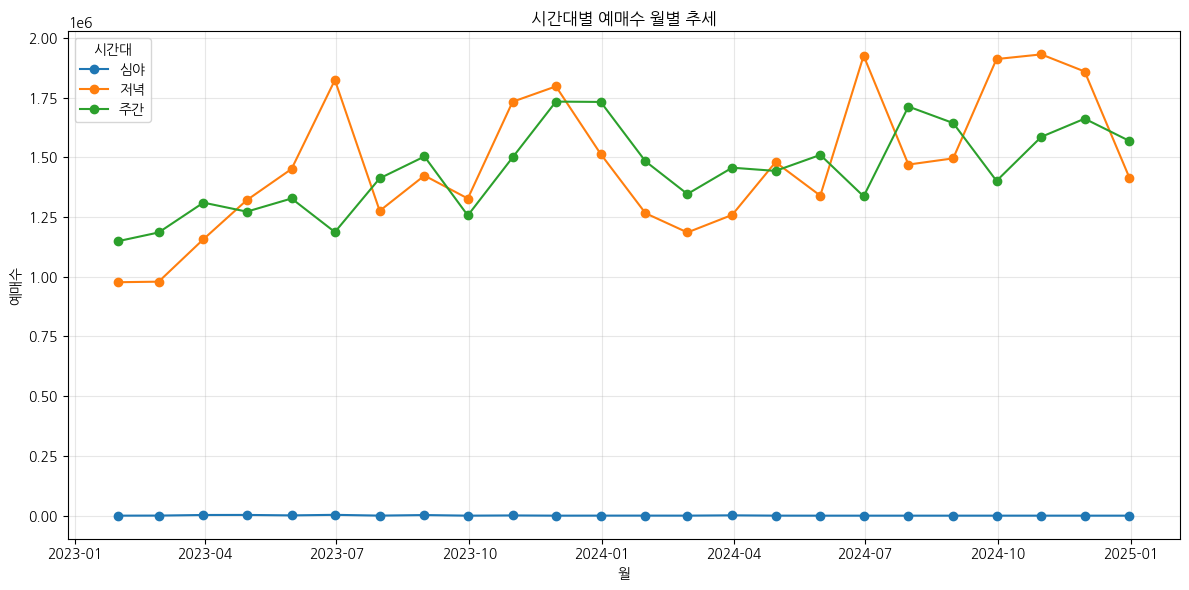

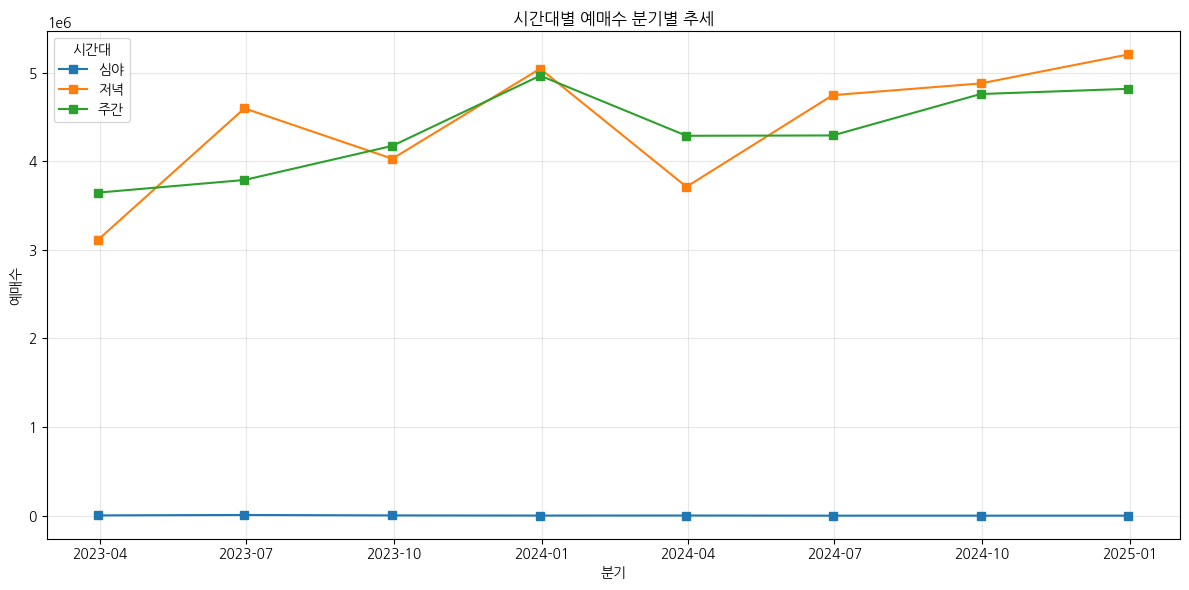

In [149]:
import matplotlib.pyplot as plt
import pandas as pd

# ÎÇ†Ïßú Î≥ÄÌôò
time_stats["ÎÇ†Ïßú"] = pd.to_datetime(time_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")

# ========================
# 1) Ïõî Îã®ÏúÑ Ìä∏Î†åÎìú
# ========================
monthly_trend = (
    time_stats.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="M"), "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])
    .agg({"ÏòàÎß§Ïàò": "sum"})
    .reset_index()
)

plt.figure(figsize=(12,6))
for t in monthly_trend["ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"].unique():
    subset = monthly_trend[monthly_trend["ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"] == t]
    plt.plot(subset["ÎÇ†Ïßú"], subset["ÏòàÎß§Ïàò"], marker="o", label=t)

plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏòàÎß§Ïàò ÏõîÎ≥Ñ Ï∂îÏÑ∏")
plt.ylabel("ÏòàÎß§Ïàò")
plt.xlabel("Ïõî")
plt.legend(title="ÏãúÍ∞ÑÎåÄ")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# ========================
# 2) Î∂ÑÍ∏∞ Îã®ÏúÑ Ìä∏Î†åÎìú
# ========================
quarterly_trend = (
    time_stats.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="Q"), "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])
    .agg({"ÏòàÎß§Ïàò": "sum"})
    .reset_index()
)

plt.figure(figsize=(12,6))
for t in quarterly_trend["ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"].unique():
    subset = quarterly_trend[quarterly_trend["ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"] == t]
    plt.plot(subset["ÎÇ†Ïßú"], subset["ÏòàÎß§Ïàò"], marker="s", label=t)

plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏòàÎß§Ïàò Î∂ÑÍ∏∞Î≥Ñ Ï∂îÏÑ∏")
plt.ylabel("ÏòàÎß§Ïàò")
plt.xlabel("Î∂ÑÍ∏∞")
plt.legend(title="ÏãúÍ∞ÑÎåÄ")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


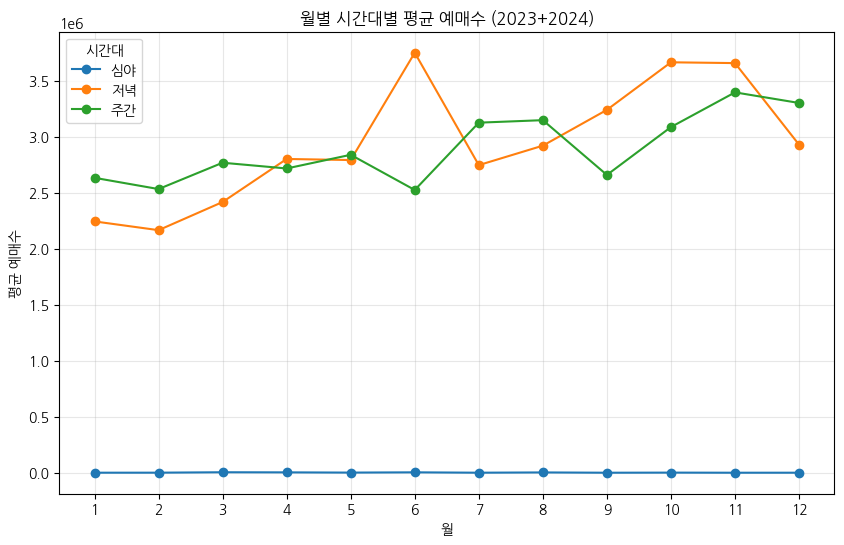

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

# ÎÇ†Ïßú Î≥ÄÌôò
time_stats["ÎÇ†Ïßú"] = pd.to_datetime(time_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")

# Ïõî/ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏßëÍ≥Ñ
monthly_trend = (
    time_stats.groupby([time_stats["ÎÇ†Ïßú"].dt.month, "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])
    .agg({"ÏòàÎß§Ïàò": "sum"})
    .reset_index()
    .rename(columns={"ÎÇ†Ïßú": "Ïõî"})
)

# Îëê Í∞úÎÖÑ(2023+2024) ÌèâÍ∑† Í≥ÑÏÇ∞
monthly_avg = (
    monthly_trend.groupby(["Ïõî", "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])["ÏòàÎß§Ïàò"]
    .mean()
    .reset_index()
)

# ÌîºÎ≤ó (Ïõî √ó ÏãúÍ∞ÑÎåÄ)
pivot_avg = monthly_avg.pivot(index="Ïõî", columns="ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò", values="ÏòàÎß§Ïàò")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
for col in pivot_avg.columns:
    plt.plot(pivot_avg.index, pivot_avg[col], marker="o", label=col)

plt.title("ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† ÏòàÎß§Ïàò (2023+2024)")
plt.xlabel("Ïõî")
plt.ylabel("ÌèâÍ∑† ÏòàÎß§Ïàò")
plt.xticks(range(1,13))
plt.legend(title="ÏãúÍ∞ÑÎåÄ")
plt.grid(True, alpha=0.3)
plt.show()


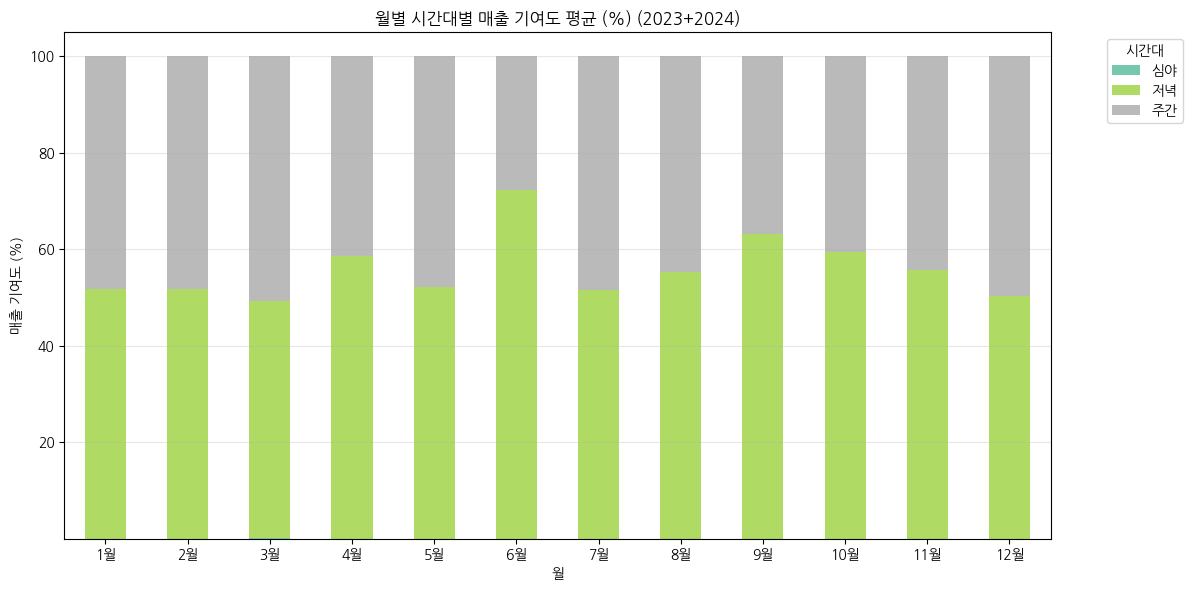

In [151]:
import matplotlib.pyplot as plt
import pandas as pd

# ÎÇ†Ïßú Î≥ÄÌôò
time_stats["ÎÇ†Ïßú"] = pd.to_datetime(time_stats["ÎÇ†Ïßú"], format="%Y%m%d", errors="coerce")

# Ïõî Îã®ÏúÑ ÏßëÍ≥Ñ
monthly_sales = (
    time_stats.groupby([pd.Grouper(key="ÎÇ†Ïßú", freq="MS"), "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])
    .agg({"Ï¥ùÌã∞ÏºìÌåêÎß§Ïï°": "sum"})
    .reset_index()
)

# Ï†ÑÏ≤¥ Îß§Ï∂ú ÎåÄÎπÑ ÎπÑÏ§ë Í≥ÑÏÇ∞
monthly_sales["Ï¥ùÎß§Ï∂ú"] = monthly_sales.groupby("ÎÇ†Ïßú")["Ï¥ùÌã∞ÏºìÌåêÎß§Ïï°"].transform("sum")
monthly_sales["Îß§Ï∂úÎπÑÏ§ë"] = monthly_sales["Ï¥ùÌã∞ÏºìÌåêÎß§Ïï°"] / monthly_sales["Ï¥ùÎß§Ï∂ú"] * 100

# üëâ Ïõî(Ïà´Ïûê) Ï∂îÏ∂ú
monthly_sales["Ïõî"] = monthly_sales["ÎÇ†Ïßú"].dt.month

# Îëê Í∞úÎÖÑ(2023+2024) ÌèâÍ∑†
monthly_avg = (
    monthly_sales.groupby(["Ïõî", "ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò"])["Îß§Ï∂úÎπÑÏ§ë"]
    .mean()
    .reset_index()
)

# ÌîºÎ≤ó (Ïõî √ó ÏãúÍ∞ÑÎåÄ)
pivot_avg = monthly_avg.pivot(index="Ïõî", columns="ÏãúÍ∞ÑÎåÄ_ÎåÄÎ∂ÑÎ•ò", values="Îß§Ï∂úÎπÑÏ§ë")

# stacked bar chart
pivot_avg.plot(
    kind="bar", stacked=True, figsize=(12,6),
    colormap="Set2", alpha=0.9
)

plt.title("ÏõîÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ ÌèâÍ∑† (%) (2023+2024)")
plt.ylabel("Îß§Ï∂ú Í∏∞Ïó¨ÎèÑ (%)")
plt.xlabel("Ïõî")
plt.xticks(range(0,12), [f"{m}Ïõî" for m in range(1,13)], rotation=0)
plt.legend(title="ÏãúÍ∞ÑÎåÄ", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
merged_price_genre = price_stats.merge(
    genre_service[['ÎÇ†Ïßú', 'Ïû•Î•¥', 'Í¥ÄÍ∞ùÏàò', 'Îß§Ï∂úÏï°']],
    on=['ÎÇ†Ïßú', 'Ïû•Î•¥'],
    how='left'
)

In [21]:
merged_price_genre["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Ïû•Î•¥ÎπÑÏ§ë(%)"] = (
    merged_price_genre["Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Ïû•Î•¥ÎπÑÏ§ë(%)"]
    .replace("###.#", "0")
)

In [22]:
merged_price_genre['ÏòàÏÉÅÍ¥ÄÍ∞ùÏàò'] = merged_price_genre['Í¥ÄÍ∞ùÏàò'] * (merged_price_genre['Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Ïû•Î•¥ÎπÑÏ§ë(%)'].astype(float) / 100)

In [34]:
merged_price_genre['ÏòàÏÉÅÎß§Ï∂úÏï°'] = (
    merged_price_genre['Îß§Ï∂úÏï°'] *
    (merged_price_genre['Ï¥ù Ìã∞ÏºìÌåêÎß§Ïàò_Ïû•Î•¥ÎπÑÏ§ë(%)'].astype(float) / 100)
)

In [34]:
import re

# ÏöîÏùº Î¶¨Ïä§Ìä∏ (ÌïúÍµ≠Ïñ¥ ‚Üí Î≤àÌò∏ Îß§Ìïë)
weekdays = ["Ïõî", "Ìôî", "Ïàò", "Î™©", "Í∏à", "ÌÜ†", "Ïùº"]
weekday_map = {day: i for i, day in enumerate(weekdays)}

def expand_schedule(schedule):
    results = []
    # Í¥ÑÌò∏ Ïïà ÏãúÍ∞Ñ Ï∂îÏ∂ú
    parts = re.findall(r"([ÏõîÌôîÏàòÎ™©Í∏àÌÜ†Ïùº](?:ÏöîÏùº)?(?:\s*~\s*[ÏõîÌôîÏàòÎ™©Í∏àÌÜ†Ïùº](?:ÏöîÏùº)?)?)\((.*?)\)", schedule)
    
    for day_expr, times in parts:
        # ÏöîÏùº Î≤îÏúÑ Ï≤òÎ¶¨
        if "~" in day_expr:
            start, end = [d.replace("ÏöîÏùº","").strip() for d in day_expr.split("~")]
            start_idx, end_idx = weekday_map[start], weekday_map[end]
            days = weekdays[start_idx:end_idx+1]
        else:
            days = [day_expr.replace("ÏöîÏùº","").strip()]
        
        # ÏãúÍ∞Ñ Ïó¨Îü¨ Í∞úÎ©¥ split
        time_list = [t.strip() for t in times.split(",")]
        
        # ÏöîÏùº-ÏãúÍ∞Ñ Ï°∞Ìï©
        for d in days:
            for t in time_list:
                results.append((d, t))
    return results

In [35]:
performance_play_test = performance_play.copy()

In [36]:
performance_play_test["ÏöîÏùºÏãúÍ∞Ñ"] = performance_play_test["Í≥µÏó∞ÏãúÍ∞Ñ"].apply(
    lambda x: expand_schedule(x) if isinstance(x, str) else []
)

In [37]:
def runtime_to_minutes(x):
    if not isinstance(x, str):
        return None
    hours = 0
    minutes = 0
    
    # "Ïà´ÏûêÏãúÍ∞Ñ" Ìå®ÌÑ¥ Ï∞æÍ∏∞
    h_match = re.search(r"(\d+)ÏãúÍ∞Ñ", x)
    if h_match:
        hours = int(h_match.group(1))
    
    # "Ïà´ÏûêÎ∂Ñ" Ìå®ÌÑ¥ Ï∞æÍ∏∞
    m_match = re.search(r"(\d+)Î∂Ñ", x)
    if m_match:
        minutes = int(m_match.group(1))
    
    return hours * 60 + minutes

In [38]:
performance_play_test["Îü∞ÌÉÄÏûÑ_Î∂Ñ"] = performance_play_test["Îü∞ÌÉÄÏûÑ"].apply(runtime_to_minutes)

In [39]:
performance_play_test = performance_play_test.explode("ÏöîÏùºÏãúÍ∞Ñ").reset_index(drop=True)
performance_play_test[["ÏöîÏùº","Í≥µÏó∞ÏãúÍ∞Å"]] = pd.DataFrame(performance_play_test["ÏöîÏùºÏãúÍ∞Ñ"].tolist(), index=performance_play_test.index)

In [40]:
bins = list(range(0, 25, 3))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

def get_time_slots(start_time, runtime):
    if pd.isna(start_time) or pd.isna(runtime):
        return []
    
    # ÏãúÏûë/ÎÅù ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    start_h = int(start_time.split(":")[0])
    end_h = start_h + (runtime // 60) + (1 if runtime % 60 > 0 else 0)  # Ïò¨Î¶º
    if end_h > 24: 
        end_h = 24  # ÏûêÏ†ï ÎÑòÏúºÎ©¥ ÏûòÎùºÏ§å
    
    slots = []
    for i in range(len(bins)-1):
        s, e = bins[i], bins[i+1]
        # Í≥µÏó∞ Íµ¨Í∞Ñ [start_h, end_h)ÏôÄ ÏãúÍ∞ÑÎåÄ [s, e) Í≤πÏπòÎ©¥ Ìè¨Ìï®
        if not (end_h <= s or start_h >= e):
            slots.append(f"{s}-{e}")
    return slots

In [41]:
performance_play_test['ÏãúÍ∞ÑÎåÄ_Í∑∏Î£π'] = performance_play_test.apply(lambda row: get_time_slots(row['Í≥µÏó∞ÏãúÍ∞Å'], row['Îü∞ÌÉÄÏûÑ_Î∂Ñ']), axis=1)

In [42]:
performance_play_test = performance_play_test.explode('ÏãúÍ∞ÑÎåÄ_Í∑∏Î£π').reset_index(drop=True)

In [55]:
# Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
price_bins = [
    (0, 1, "0"),
    (1, 30000, "~3"),
    (30000, 50000, "3~5"),
    (50000, 70000, "5~7"),
    (70000, 100000, "7~10"),
    (100000, 150000, "10~15"),
    (150000, float("inf"), "15~")
]

def map_price_to_range(price):
    for low, high, label in price_bins:
        if low <= price < high:
            return label
    return None

In [57]:
performance_play_test.Ìã∞ÏºìÍ∞ÄÍ≤©_list.value_counts()

Ìã∞ÏºìÍ∞ÄÍ≤©_list
[30000]                         6866
[40000]                         3292
[50000]                         3181
[35000]                         2931
[20000]                         2493
                                ... 
[20000, 50000]                     1
[40000, 22000, 28000, 18000]       1
[80000, 50000, 30000]              1
[48000]                            1
[49000]                            1
Name: count, Length: 153, dtype: int64

In [65]:
import ast

performance_play_test["Ìã∞ÏºìÍ∞ÄÍ≤©_list"] = performance_play_test["Ìã∞ÏºìÍ∞ÄÍ≤©_list"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

performance_play_test["Í∞ÄÍ≤©ÎåÄ"] = performance_play_test["Ìã∞ÏºìÍ∞ÄÍ≤©_list"].apply(
    lambda prices: [map_price_to_range(int(str(p).replace(",", "").strip())) for p in prices]
    if isinstance(prices, list) else []
)

In [74]:
performance_play_test = performance_play_test.explode("Í∞ÄÍ≤©ÎåÄ").reset_index(drop=True)

In [75]:
performance_play_test = performance_play_test.to_csv("../datasets/KOPIS/statics/Í≥µÏó∞ÏÉÅÏÑ∏Ï†ïÎ≥¥(ÏãúÍ∞ÑÎåÄ+Í∞ÄÍ≤©ÎåÄ).csv", index=False, encoding="utf-8-sig")

In [28]:
from datetime import timedelta

def expand_dates(row):
    START = pd.Timestamp("2023-01-01")
    END = pd.Timestamp("2024-12-31")
    
    start = max(row['Í≥µÏó∞ÏãúÏûëÏùº'], START)
    end = min(row['Í≥µÏó∞Ï¢ÖÎ£åÏùº'], END)
    
    if start > end:
        return []
    
    dates = pd.date_range(start, end, freq="D").strftime("%Y%m%d").tolist()
    return list(dates)

In [29]:
performance_play_test["ÏÉÅÏó∞Ïùº"] = performance_play_test.apply(expand_dates, axis=1)

In [30]:
play_date_map = performance_play_test[["Í≥µÏó∞ID", "ÏÉÅÏó∞Ïùº"]].copy()

In [31]:
play_date_map = play_date_map.explode("ÏÉÅÏó∞Ïùº").reset_index(drop=True)

In [33]:
play_date_map.to_csv("../datasets/KOPIS/statics/ÏÉÅÏó∞ÏùºÏûêÎ≥ÑÍ≥µÏó∞IDÎ™©Î°ù.csv", index=False, encoding="utf-8-sig")

In [81]:
performance_play = pd.read_csv("../datasets/KOPIS/statics/Í≥µÏó∞ÏÉÅÏÑ∏Ï†ïÎ≥¥(ÏãúÍ∞ÑÎåÄ+Í∞ÄÍ≤©ÎåÄ).csv")

In [82]:
performance_play.columns

Index(['Í≥µÏó∞ID', 'Í≥µÏó∞Î™Ö', 'Í≥µÏó∞ÏãúÏûëÏùº', 'Í≥µÏó∞Ï¢ÖÎ£åÏùº', 'Í≥µÏó∞ÏãúÏÑ§Î™Ö', 'Ï∂úÏó∞ÏßÑ', 'Ï†úÏûëÏßÑ', 'Îü∞ÌÉÄÏûÑ', 'Í¥ÄÎûåÏó∞Î†π',
       'Ï†úÏûëÏÇ¨', 'Í∏∞ÌöçÏÇ¨', 'Ï£ºÏµú', 'Ï£ºÍ¥Ä', 'Ìã∞ÏºìÍ∞ÄÍ≤©', 'Ìè¨Ïä§ÌÑ∞URL', 'Ï§ÑÍ±∞Î¶¨', 'Í≥µÏó∞ÏßÄÏó≠', 'Í≥µÏó∞Ïû•Î•¥Î™Ö',
       'Ïò§ÌîàÎü∞', 'ÎÇ¥ÌïúÏó¨Î∂Ä', 'ÏïÑÎèôÍ≥µÏó∞Ïó¨Î∂Ä', 'ÎåÄÌïôÎ°úÍ≥µÏó∞Ïó¨Î∂Ä', 'Ï∂ïÏ†úÏó¨Î∂Ä', 'ÎÆ§ÏßÄÏª¨ÎùºÏù¥ÏÑºÏä§', 'ÎÆ§ÏßÄÏª¨Ï∞ΩÏûë', 'ÏµúÏ¢ÖÏàòÏ†ïÏùº',
       'Í≥µÏó∞ÏÉÅÌÉú', 'Í≥µÏó∞ÏãúÏÑ§ID', 'Í≥µÏó∞ÏãúÍ∞Ñ', 'Ïû•Î•¥(ÌÜµÍ≥Ñ)', 'ÏÉÅÏó∞ÌöüÏàò', 'Í≥µÏó∞Î™Ö(ÌÜµÍ≥Ñ)', 'Í≥µÏó∞ÏãúÏÑ§Î™Ö(ÌÜµÍ≥Ñ)',
       'Í≥µÏó∞ÏãúÏûëÏùº(ÌÜµÍ≥Ñ)', 'Í≥µÏó∞Ï¢ÖÎ£åÏùº(ÌÜµÍ≥Ñ)', 'Ïó∞ÎèÑ(ÌÜµÍ≥Ñ)', 'Ïõî(ÌÜµÍ≥Ñ)', 'Ïû•Î•¥ÏΩîÎìú(ÌÜµÍ≥Ñ)', 'Ìã∞ÏºìÍ∞ÄÍ≤©_list',
       'ÏµúÏÜåÍ∞ÄÍ≤©', 'ÏµúÎåÄÍ∞ÄÍ≤©', 'ÏöîÏùºÏãúÍ∞Ñ', 'Îü∞ÌÉÄÏûÑ_Î∂Ñ', 'ÏöîÏùº', 'Í≥µÏó∞ÏãúÍ∞Å', 'ÏãúÍ∞ÑÎåÄ_Í∑∏Î£π', 'Í∞ÄÍ≤©ÎåÄ'],
      dtype='object')

In [83]:
performance_play.drop(columns=['ÎÆ§ÏßÄÏª¨ÎùºÏù¥ÏÑºÏä§', 'ÎÆ§ÏßÄÏª¨Ï∞ΩÏûë', 'ÏµúÏ¢ÖÏàòÏ†ïÏùº', 'Ïû•Î•¥(ÌÜµÍ≥Ñ)', 'Í≥µÏó∞Î™Ö(ÌÜµÍ≥Ñ)', 'Í≥µÏó∞ÏãúÏÑ§Î™Ö(ÌÜµÍ≥Ñ)',
                               'Í≥µÏó∞ÏãúÏûëÏùº(ÌÜµÍ≥Ñ)', 'Í≥µÏó∞Ï¢ÖÎ£åÏùº(ÌÜµÍ≥Ñ)', 'Ïó∞ÎèÑ(ÌÜµÍ≥Ñ)', 'Ïõî(ÌÜµÍ≥Ñ)', 'Ïû•Î•¥ÏΩîÎìú(ÌÜµÍ≥Ñ)'], axis=1, inplace=True)

In [85]:
performance_play.to_csv("../datasets/KOPIS/statics/Ïó∞Í∑πÏÉÅÏÑ∏Ï†ïÎ≥¥(ÏãúÍ∞ÑÎåÄ+Í∞ÄÍ≤©ÎåÄ).csv", index=False, encoding="utf-8-sig")

In [86]:
# performance_playÏóê Îì±Ïû•Ìïú Í≥µÏó∞ÏãúÏÑ§IDÎßå Ï∂îÏ∂ú
facility_ids = performance_play["Í≥µÏó∞ÏãúÏÑ§ID"].unique()

# facility_dfÏóêÏÑú Ìï¥Îãπ IDÎßå ÌïÑÌÑ∞ÎßÅ
facility_df_filtered = facility_df[facility_df["Í≥µÏó∞ÏãúÏÑ§ID"].isin(facility_ids)].copy()

print(f"ÏõêÎ≥∏ ÏãúÏÑ§ Ïàò: {len(facility_df)} ‚Üí ÌïÑÌÑ∞ÎßÅ ÌõÑ: {len(facility_df_filtered)}")

ÏõêÎ≥∏ ÏãúÏÑ§ Ïàò: 1376 ‚Üí ÌïÑÌÑ∞ÎßÅ ÌõÑ: 437


In [87]:
facility_2023_2024_play = facility_df_filtered.copy()

In [105]:
facility_2023_2024_play.to_csv("../streamlit_play/datasets/Í≥µÏó∞ÏãúÏÑ§ÏÉÅÏÑ∏Ï†ïÎ≥¥(2324Ïó∞Í∑π).csv", index=False, encoding="utf-8-sig")

In [104]:
facility_2023_2024_play.to_csv("../datasets/KOPIS/statics/Í≥µÏó∞ÏãúÏÑ§ÏÉÅÏÑ∏Ï†ïÎ≥¥(2324Ïó∞Í∑π).csv", index=False, encoding="utf-8-sig")

In [103]:
1 % 12 // 3 + 1

1